<a href="https://colab.research.google.com/github/Marcosuff/Marcosuff.github.io/blob/master/papers/generative_covid/nb/LSTM_generative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dependencies**

In [ ]:
#@title
#%%capture
#!wget -c https://raw.githubusercontent.com/bp-kelley/descriptastorus/master/requirements.txt
#!pip install git+https://github.com/bp-kelley/descriptastorus
#!pip install -r requirements.txt
#!pip install cairosvg
#!wget -c https://github.com/chemprop/chemprop/archive/master.zip && unzip master.zip
#!pip install torch
#!pip install tensorboardX && pip install typed-argument-parser
#!cd /content/chemprop-master && pip install -e .

In [ ]:
import sys
#!pip install -y sqlalchemy
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! bash Anaconda3-2019.10-Linux-x86_64.sh -bfp /usr/local
sys.path.append('/usr/local/lib/python3.7/site-packages')
!conda install -y -c rdkit rdkit
!pip install fcd

--2020-08-13 18:23:45--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   198MB/s    in 2.6s    

2020-08-13 18:23:47 (198 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - anaconda-navigator==1.9.7=py37_0
    - anacond

# **Import modules**

In [ ]:
??last_metrics

Object `last_metrics` not found.


In [ ]:
#@title
#export
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import time
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

import umap
from torch.utils.data import WeightedRandomSampler
import random
import numpy as np
from google.colab import drive

from fastai.callbacks import *
from fastai.text import *
from fastai.metrics import *

from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.metrics import roc_auc_score, recall_score, precision_score,balanced_accuracy_score,average_precision_score,confusion_matrix,plot_confusion_matrix, plot_precision_recall_curve,recall_score, precision_score, matthews_corrcoef, make_scorer, precision_recall_curve

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# export
#from fcd import *
from rdkit import Chem
from rdkit import rdBase
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.Draw import IPythonConsole,rdMolDraw2D
from IPython.display import display,Image, SVG
from rdkit.Chem import rdmolops
rdBase.DisableLog('rdApp.error')

In [ ]:
drive.mount('/content/drive',force_remount=True)
sys.path.append('/content/drive/My Drive/Generative')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from mol_utils.sampler import *
from mol_utils.utils import *
from mol_utils.SamplerCallback import *
from mol_utils.moltokenizer import *

ModuleNotFoundError: ignored

In [ ]:
masked_ytrue = yb[mask]
masked_preds = preds[mask]
masked_ytrue,masked_preds

(tensor([0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
         1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
         1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.]),
 tensor([-0.1374,  0.8483, -0.0826,  0.6268,  0.5201,  0.4933, -0.4711, -0.7023,
          0.0593, -0.5365,  0.3659,  0.3895, -1.0924,  0.4038, -0.1318,  0.7591,
          0.8082,  0.4847,  0.1129,  0.7085, -0.0270,  0.4566, -1.2955, -0.4162,
         -0.1594,  0.2585,  0.2753, -0.3655, -0.1999,  0.9104, -0.4060,  0.2158,
         -0.8677, -0.5456, -0.3312, -0.7125, -0.2373,  0.3895, -1.1379,  0.1984,
          1.0578,  0.1128, -1.1395,  0.0402, -1.0187, -0.4778,  0.5734, -0.3010,
          0.6422, -0.0424,  0.4843,  1.3478, -0.0891, -0.4544, -0.5626,  1.2010,
         -1.0152,  0.1288, -0.8487, -0.1202,  0.0903,  0.1756, -0.5013, -0.6390,
         -0.6359,  0.2515, -0.

In [ ]:
print(BCEWithLogitsFlat()(masked_preds,masked_ytrue))

tensor(0.7755, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


# **Define paths**

In [ ]:
COV = Path('/content/generative_model')
COV.mkdir(parents=True, exist_ok=True)

In [ ]:
COVCLS = Path('/content/classifier/')
COVCLS.mkdir(parents=True, exist_ok=True)

In [ ]:
Drive = Path('drive/My Drive/DDPlarform/')

CROSSVAL = Path('/content/classifier/crossvalidation')
CROSSVAL.mkdir(parents=True, exist_ok=True)

# **Helper function**

**Sampling**

In [ ]:
#@title
class AUCPR(Callback):
    "Computes the area under the curve (AUC) score based on Precision-Recall curve."
    def on_epoch_begin(self, **kwargs):
        self.targs, self.preds = LongTensor([]), Tensor([])
        
    def on_batch_end(self, last_output:Tensor, last_target:Tensor, **kwargs):
        last_output = F.softmax(last_output, dim=1)[:,0]
        self.preds = torch.cat((self.preds, last_output.cpu()))
        #print(self.preds[:10])
        self.targs = torch.cat((self.targs, last_target.cpu().long()))
    
    def on_epoch_end(self, last_metrics, **kwargs):
        return add_metrics(last_metrics, average_precision_score(self.targs,self.preds,pos_label=0))
        
def is_valid(smiles):
  mol = Chem.MolFromSmiles(smiles)
  if mol is not None and mol.GetNumAtoms()>0:
    return smiles

def uniqueness_score(mols): return set(mols)

def novelty_score(mols,ref_mols): return set.difference(mols,ref_mols)

def calc_fcd(ref_mols,mols,model=None):
  '''Calculate the Frechet ChemNet Distance (FCD) between the generated molecules and a reference'''
  return NotImplemented
 # if len(mols) != 0:
 #   act1 = get_predictions(model, list(ref_mols))
   # act2 = get_predictions(model, list(mols))

   # mu1 = np.mean(act1, axis=0)
   # sigma1 = np.cov(act1.T)

   # mu2 = np.mean(act2, axis=0)
   # sigma2 = np.cov(act2.T)

    #fcd_score = calculate_frechet_distance(mu1=mu1,mu2=mu2,sigma1=sigma1,sigma2=sigma2)
   # return fcd_score

 # else:
   # return np.nan


def sampling(model,dt,text:str, n_words:int, temperature:float=1., sep:str=' '):
  "Vanilla sampling. Return `text` and the `n_words` that come after"
  model.model.reset()
  v = dt.vocab
  
  xb,yb = dt.one_item(text)
  new_idx = []
  for _ in range(n_words):
    res = model.pred_batch(batch=(xb,yb))[0][-1]

    if temperature != 1.: 
      res.pow_(1 / temperature)
    idx = torch.multinomial(res, 1).item()
    if idx != len(v.itos)-1:              
      new_idx.append(idx)
      xb = xb.new_tensor([idx])[None]
    else:
      break
  return text + sep + sep.join(v.textify(new_idx, sep=None))
sampling_temperatures = [0.2,0.5,0.6,0.7,0.75,0.8,1.0,1.2]
def validation(model,dt,sampling_temperatures,iterations,samples,ref,maxsize=140):
  
  '''Vanilla sampling and validation function'''
  _validity = np.zeros((iterations,len(sampling_temperatures)))
  _novelty = np.zeros((iterations,len(sampling_temperatures)))
  _uniqueness = np.zeros((iterations,len(sampling_temperatures)))

  for j in range(len(sampling_temperatures)):
    temp = sampling_temperatures[j]
    print('Temperatures = {}'.format(temp))
    for i in range(iterations):
      print('Starting iteration {}'.format(i))
      p = [sampling(model,dt,text='',n_words=maxsize,sep='',temperature=temp).replace(PAD,'').replace(BOS,'').replace(EOS,'').replace(UNK,'') for i in range(0,samples)]
      mols = list(filter(is_valid,p)) # Valid
      unq_mols = uniqueness_score(mols) # Uniqueness # Unique
      novel_mols = novelty_score(unq_mols, ref) # Novel

      _novelty[i,j] = len(novel_mols)/samples*100
      _uniqueness[i,j] = len(unq_mols)/samples*100
      _validity[i,j] = len(mols)/samples*100

      print('Iteration {} ended'.format(i))
    print('----------------------------------')
  return _validity, _novelty, _uniqueness

**Tokenizer**

In [ ]:
#@title
class MolTokenizer(BaseTokenizer):
  ''' Atom-level tokenizer. Splits molecules into individual atoms and special enviroments.
  A special enviroment is defined by any elements inside square brackets (e.g., [nH])
  '''
  def __init__(self, lang:str):
    pass
  def tokenizer(self,t:str) -> List[str]:
    assert type(t) == str
    pat = '(\[.*?\])' # Find special enviroments (e.g., [CH],[NH] etc)
    tokens = []
    t = t.replace('Br','L').replace('Cl','X') # Replace halogens
    atom_list = re.split(pat,t)
    for s in atom_list:
      if s.startswith('['):
        tokens.append(s)
      else:
        tokens += [x for x in list(s)]
    tokens = [x.replace('L','Br').replace('X','Cl') for x in tokens] # Decode halogens
    return [BOS] + tokens + [EOS]# + [PAD for i in range(133-len(tokens))]

class Create_Vocab(object):
  '''Tokenize and create vocabulary of atoms in SMILES strings'''
  def __init__(self,smiles):
    self.smiles = smiles

  def tokenize(self):
    k = MolTokenizer
    tok = Tokenizer(k,pre_rules=[],post_rules=[])
    tokens = tok.process_all(self.smiles)

    unique_tokens = [UNK, PAD] + sorted(list({y for x in tokens for y in x}))
    vocab = Vocab(itos=unique_tokens)
    
    return unique_tokens, vocab



# **Load data**

In [ ]:
# export
# Model config
config = awd_lstm_lm_config.copy()
config['n_hid'] = 512;

config_cls = {'bidir': False,
 'emb_sz': 400,
 'embed_p': 0.02,
 'hidden_p': 0.15,
 'input_p': 0.25,
 'n_hid': 512,
 'n_layers': 3,
 'output_p': 0.1,
 'pad_token': 1,
 'qrnn': False,
 'weight_p': 0.2}


In [ ]:
chembl = pd.read_csv('drive/My Drive/Generative/data/ChEMBL_v1.csv').sample(n=500)

# **Encoder**

In [ ]:
from fastai.text import *

BOS,EOS,FLD,UNK,PAD = 'xxbos','xxeos','xxfld','xxunk','xxpad'
defaults.text_spec_tok = [UNK,PAD,BOS,EOS]

class MolTokenizer(BaseTokenizer):
  ''' Atom-level tokenizer. Splits molecules into individual atoms and special enviroments.
  A special enviroment is defined by any elements inside square brackets (e.g., [nH])
  '''
  def __init__(self, lang:str):
    pass
  def tokenizer(self,t:str) -> List[str]:
    assert type(t) == str
    pat = '(\[.*?\])' # Find special enviroments (e.g., [CH],[NH] etc)
    tokens = []
    t = t.replace('Br','L').replace('Cl','X') # Replace halogens
    atom_list = re.split(pat,t)
    for s in atom_list:
      if s.startswith('['):
        tokens.append(s)
      else:
        tokens += [x for x in list(s)]
    tokens = [x.replace('L','Br').replace('X','Cl') for x in tokens] # Decode halogens
    return [BOS] + tokens + [EOS]

class Create_Vocab(object):
  '''Tokenize and create vocabulary of atoms in SMILES strings'''
  def __init__(self,smiles):
    self.smiles = smiles

  def tokenize(self):
    k = MolTokenizer
    tok = Tokenizer(k,pre_rules=[],post_rules=[])
    tokens = tok.process_all(self.smiles)

    unique_tokens = [UNK, PAD] + sorted(list({y for x in tokens for y in x}))
    vocab = Vocab(itos=unique_tokens)
    
    return unique_tokens, vocab


In [ ]:
tokenizer = 
pp = Create_Vocab(list(chembl.Smiles))
unique_tokens,vocab = pp.tokenize()

In [ ]:
vocab.itos[len(vocab.itos)-1]

'xxeos'

In [ ]:
tokenizer

Tokenizer MolTokenizer in en with the following rules:

In [ ]:
tokenizer = Tokenizer(MolTokenizer,pre_rules=[],post_rules=[],special_cases=[PAD,BOS,EOS,UNK])
processors = [TokenizeProcessor(tokenizer=tokenizer, mark_fields=False,include_bos=False),
            NumericalizeProcessor(vocab=vocab)]
src = (TextList.from_df(chembl,cols='Smiles',processor=processors).split_by_rand_pct(0.10).label_for_lm())


In [ ]:
data = src.databunch()

In [ ]:
data.show_batch()

idx,text
0,C ( C O P ( = O ) ( O ) O ) O 3 ) c ( = O ) [nH] c 2 = O ) c c 1 xxeos xxbos C O c 1 c ( - c 2 c n [nH] c 2 ) c c c ( C ( = O ) N C ( C O ) c 2 c ( F ) c
1,3 = N O C ( c 4 c c c ( F ) c c 4 ) C 3 ) s c 3 n c c c c 2 3 ) c c 1 xxeos xxbos N S ( = O ) ( = O ) c 1 c c c c c 1 N S ( = O ) ( = O ) c 1 c c c
2,c ( C ) c 1 O xxeos xxbos C O c 1 c c c ( C 2 C N ( C ) C c 3 c c ( O C C C N 4 C C N ( c 5 c c c c c 5 O ) C C 4 ) c c c 3 2 ) c c 1 xxeos xxbos C O C C O
3,C c 3 c c c c c 3 Cl ) S ( C ) ( = O ) = O ) c c 2 ) C C 1 xxeos xxbos C O c 1 c c 2 c ( c ( O C ) c 1 O C ) c 1 c 3 c ( c c 4 c 1 n 2 C ( = O ) C C
4,c c c 1 F xxeos xxbos C N ( C C C C N 1 C ( = O ) c 2 c c c c c 2 C 1 = O ) C c 1 c c c c ( Cl ) c 1 xxeos xxbos C C 1 C N ( C ( C ) C O ) C ( = O ) c 2 c c


In [ ]:
data.save('data_general.pkl')

In [ ]:
#data = load_data(Drive,'data_v2_1.pkl')

In [ ]:
learn = language_model_learner(data, AWD_LSTM, config=config,pretrained=False,drop_mult=0.1,model_dir=Path('.'),
                               metrics=[accuracy,error_rate],callback_fns=[partial(CSVLogger,append=True)])

In [ ]:
data.show_batch(
    
)

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,2 N 2 C C O C C 2 ) c c 1 O C C xxeos xxbos C C C N C ( = O ) c 1 c c c 2 c ( c c n 2 - c 2 n c c 3 c ( n 2 ) N ( C 2 C C C C 2 ) C ( C C ) C ( = O
1,1 C C C ( c 2 n o c 3 c c c ( F ) c c 2 3 ) C C 1 xxeos xxbos O = C ( C C n 1 c ( = O ) o c 2 c c ( Cl ) c c c 2 1 ) N c 1 c c c ( N 2 C C O C C 2 )
2,c c c 5 o 4 ) n n 2 3 ) c 1 xxeos xxbos C ( = N N c 1 n c 2 c c c c c 2 o 1 ) c 1 c c c c n 1 xxeos xxbos O = C ( N c 1 c c c ( C c 2 c c c c c 2 ) c c 1 )
3,( C ) = O ) C 1 2 C xxeos xxbos O = C ( N C c 1 c c c ( C ( = O ) N 2 C C C ( c 3 c c c c c 3 ) C C 2 ) c c 1 ) N c 1 c c c ( Cl ) c c 1 xxeos xxbos C N ( C
4,( F ) ( F ) F ) c 2 ) C C 1 xxeos xxbos O = P 1 ( N ( C C Cl ) C C Cl ) N C C ( Cl ) C O 1 xxeos xxbos C O C ( = O ) C 1 C S C ( c 2 n c 3 c c c ( O C ) c c 3


In [ ]:
learn.predict('C',)

'C Br'

In [ ]:
(Drive/'encoder_v2_1').ls()

[PosixPath('drive/My Drive/Generative/encoder_v2_1/data_v2_1.pkl'),
 PosixPath('drive/My Drive/Generative/encoder_v2_1/history.csv'),
 PosixPath('drive/My Drive/Generative/encoder_v2_1/encoder_uniqueness_2K.csv'),
 PosixPath('drive/My Drive/Generative/encoder_v2_1/encoder_v2_1_genmetrics.csv'),
 PosixPath('drive/My Drive/Generative/encoder_v2_1/encoder_validity_2K.csv'),
 PosixPath('drive/My Drive/Generative/encoder_v2_1/encoder_novelty_2K.csv'),
 PosixPath('drive/My Drive/Generative/encoder_v2_1/tmp.pth'),
 PosixPath('drive/My Drive/Generative/encoder_v2_1/bestmodel.pth'),
 PosixPath('drive/My Drive/Generative/encoder_v2_1/encoder_v2_1.pth'),
 PosixPath('drive/My Drive/Generative/encoder_v2_1/encoder_v2_1.pkl'),
 PosixPath('drive/My Drive/Generative/encoder_v2_1/encoder_v2_1_50K.smi'),
 PosixPath('drive/My Drive/Generative/encoder_v2_1/fit1.pth')]

In [ ]:
!cp drive/My\ Drive/Generative/encoder_v2_1/fit1.pth {LM}

In [ ]:
learn.load('fit1');

In [ ]:
data = load_data(path=Path('drive/My Drive/Generative/encoder_v2_1/'),file='data_v2_1.pkl')

In [ ]:
data.vocab.save(LM/'vocab.pkl')

In [ ]:
!cp /content/general_model/encoder_weights.pth drive/My\ Drive/Generative/encoder_v2_1/

In [ ]:
learn.lr_find(num_it=600)

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.09E-05
Min loss divided by 10: 2.03E-02


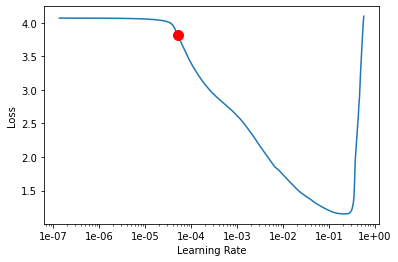

In [ ]:
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(10, 3e-3,callbacks=[SamplingCB(learn,num_samples=1000,objective_mols=set(list(chembl.Smiles))),
                                        SaveModelCallback(learn, every='improvement', monitor='accuracy', name='bestmodel')])                     

In [ ]:
learn.save('general_weights')

In [ ]:
learn.save_encoder('general_encoder')

In [ ]:
learn.validate(data.valid_dl)

[0.47671342, tensor(0.8304), tensor(0.1696)]

In [ ]:
learn.export(file='general_model.pkl')

## **Sampling**

In [ ]:
help(MolSampler)

In [ ]:
# Sampling
tmps = [0.7,0.85,1.,1.2]
multi_valid = []#[Sampler(data=data,model=learn_fn,temp=f,max_size=140,max_mols=2000).generate() for f in tmps]
for f in tmps:
  sampler = MolSampler(data=data,model=learn_fn,temp=f,max_size=140,max_mols=2500)
  multi_valid.append(sampler.generate())

Generation completed after 334.399s
Generation completed after 328.741s
Generation completed after 332.496s
Generation completed after 369.672s


In [ ]:
flattenlist = lambda x : [a for i in x for a in i]
a = flattenlist(multi_valid)

In [ ]:
adf = pd.DataFrame({'Smiles': a})
adf.head()

,Smiles
0,Cc1ccccc1-n1c(SCC(=O)NNC(=O)c2ccc(O)cc2)nnc1-c...
1,Cc1ccc(OCCCC(=O)Nc2cccc(S(=O)(=O)N3CCCCC3)c2)cc1
2,CC1(C)Cc2nc3sc4c(=O)n(CC(=O)NCCC5=CCCCC5)cnc4c...
3,CC(C)c1nc2ccccc2c(=O)n1NC(=O)c1ccccc1
4,CC(C)c1ccc(S(=O)(=O)N2CCCC(c3nc(-c4cccc(Br)c4)...


In [ ]:
learn_cls.data.add_test(list(adf.Smiles))
test_preds,p = learn_cls.get_preds(ds_type=DatasetType.Test)

In [ ]:
test_preds.shape

torch.Size([10000, 2])

In [ ]:
adf['preds'] = test_preds[:,0]
adf['label'] = np.where(test_preds[:,0]>0.5,'Active','Inactive')

In [ ]:
adf.head()

,Smiles,preds,label
0,Cc1ccccc1-n1c(SCC(=O)NNC(=O)c2ccc(O)cc2)nnc1-c...,9.019103e-06,Inactive
1,Cc1ccc(OCCCC(=O)Nc2cccc(S(=O)(=O)N3CCCCC3)c2)cc1,2.670651e-08,Inactive
2,CC1(C)Cc2nc3sc4c(=O)n(CC(=O)NCCC5=CCCCC5)cnc4c...,6.063827e-07,Inactive
3,CC(C)c1nc2ccccc2c(=O)n1NC(=O)c1ccccc1,8.440512e-08,Inactive
4,CC(C)c1ccc(S(=O)(=O)N2CCCC(c3nc(-c4cccc(Br)c4)...,9.987888e-10,Inactive


In [ ]:
Counter(adf['label'])

Counter({'Active': 73, 'Inactive': 9927})

In [ ]:
adf.to_csv(Drive/'mulisampled10k.csv',index=False)

In [ ]:
act = adf.loc[adf['label']=='Active']
act

,Smiles,preds,label
15,O=C(O)CCn1cc(C=C2C(=O)NC(=O)N(c3ccccc3)C2=O)c2...,0.717311,Active
97,C=CCN1C(=O)C(c2ccccc2)(c2ccccc2)N1C(=O)OCC,0.909851,Active
314,COCCCNC(=O)c1cc2c(=O)n(C)c3ccccc3c2s1,0.501561,Active
467,CCC(C)(C)n1nnnc1C(c1cc2ccc(C)cc2[nH]c1=O)N1CCCCC1,0.978930,Active
656,CC(=O)c1cccc(NC(=O)c2nc(S(=O)(=O)Cc3ccccc3)ncc...,0.999960,Active
...,...,...,...
9660,COC(=O)c1sc(S(=O)(=O)C(C)(CCS(=O)(=O)O)S(=O)(=...,0.706633,Active
9773,O=C1NC(=S)N(Cc2ccco2)C(=O)C1=Cc1ccc(F)cc1,0.998659,Active
9822,OCCNC(=S)Nc1nccs1,0.642514,Active
9837,CN1CCN(C(c2cccc(Br)c2)c2ccc3cccnc3c2O)CC1,1.000000,Active


In [ ]:
act['mol'] = act['Smiles'].apply(lambda x : Chem.MolFromSmiles(x))
act.head()

,Smiles,preds,label,mol
15,O=C(O)CCn1cc(C=C2C(=O)NC(=O)N(c3ccccc3)C2=O)c2...,0.717311,Active,<rdkit.Chem.rdchem.Mol object at 0x7f7491381a80>
97,C=CCN1C(=O)C(c2ccccc2)(c2ccccc2)N1C(=O)OCC,0.909851,Active,<rdkit.Chem.rdchem.Mol object at 0x7f7491381760>
314,COCCCNC(=O)c1cc2c(=O)n(C)c3ccccc3c2s1,0.501561,Active,<rdkit.Chem.rdchem.Mol object at 0x7f7491381990>
467,CCC(C)(C)n1nnnc1C(c1cc2ccc(C)cc2[nH]c1=O)N1CCCCC1,0.978930,Active,<rdkit.Chem.rdchem.Mol object at 0x7f7491381850>
656,CC(=O)c1cccc(NC(=O)c2nc(S(=O)(=O)Cc3ccccc3)ncc...,0.999960,Active,<rdkit.Chem.rdchem.Mol object at 0x7f74913818a0>


In [ ]:
Draw.MolsToGridImage(list(act['mol']),maxMols=75,legends=list(map(str,list(act['preds']))),molsPerRow=3,subImgSize=(600,600))

## **Validation**

In [ ]:
validity, novelty, uniqueness,mols,unq_mols,novel_mols = validation(learn,data,sampling_temperatures,5,2000,ref=list(df.Smiles))

Temperatures = 0.2
Starting iteration 0
Iteration 0 ended
Starting iteration 1
Iteration 1 ended
Starting iteration 2
Iteration 2 ended
Starting iteration 3
Iteration 3 ended
Starting iteration 4
Iteration 4 ended
----------------------------------
Temperatures = 0.5
Starting iteration 0
Iteration 0 ended
Starting iteration 1
Iteration 1 ended
Starting iteration 2
Iteration 2 ended
Starting iteration 3
Iteration 3 ended
Starting iteration 4
Iteration 4 ended
----------------------------------
Temperatures = 0.6
Starting iteration 0
Iteration 0 ended
Starting iteration 1
Iteration 1 ended
Starting iteration 2
Iteration 2 ended
Starting iteration 3
Iteration 3 ended
Starting iteration 4
Iteration 4 ended
----------------------------------
Temperatures = 0.7
Starting iteration 0
Iteration 0 ended
Starting iteration 1
Iteration 1 ended
Starting iteration 2
Iteration 2 ended
Starting iteration 3
Iteration 3 ended
Starting iteration 4
Iteration 4 ended
----------------------------------
Temp

In [ ]:
val_df = pd.DataFrame(validity,columns=['Temp_{}'.format(i) for i in sampling_temperatures])
nov_df = pd.DataFrame(novelty,columns=['Temp_{}'.format(i) for i in sampling_temperatures])
unq_df = pd.DataFrame(uniqueness,columns=['Temp_{}'.format(i) for i in sampling_temperatures])


In [ ]:
nov_df

,Temp_0.2,Temp_0.5,Temp_0.6,Temp_0.7,Temp_0.75,Temp_0.8,Temp_1.0,Temp_1.2
0,87.530562,81.408597,83.088608,85.642570,88.250126,87.455741,93.089005,96.628571
1,89.588101,81.771370,83.291139,85.341365,87.280040,89.202825,93.937824,96.420455
2,89.195402,82.814123,82.845610,85.728643,87.481146,89.303734,93.840580,96.384840
3,88.782816,81.667530,81.698686,85.699899,87.368421,89.494949,92.559834,96.235026
4,89.868892,80.735370,83.854692,85.879397,87.562941,88.258906,92.920354,96.950875


In [ ]:
val_df.to_csv(Drive/'encoder_validity_2K.csv',index=False)
nov_df.to_csv(Drive/'encoder_novelty_2K.csv',index=False)
unq_df.to_csv(Drive/'encoder_uniqueness_2K.csv',index=False)

# **Fine tuning**

In [ ]:
full = pd.read_csv('/content/drive/My Drive/DDPlarform/chembl27_kinases_filtered_pivoted.csv',sep=';')

In [ ]:
full.head(2)

,chembl_id,processed_smiles,CHEMBL203,CHEMBL1824,CHEMBL258,CHEMBL260,CHEMBL2828,CHEMBL267,CHEMBL1906,CHEMBL4179,CHEMBL2637,CHEMBL4128,CHEMBL4439,CHEMBL308,CHEMBL279,CHEMBL1913,CHEMBL262,CHEMBL301,CHEMBL331,CHEMBL3587,CHEMBL4224,CHEMBL2208,CHEMBL1936,CHEMBL1868,CHEMBL2599,CHEMBL2007,CHEMBL1974,CHEMBL3142,CHEMBL1957,CHEMBL3582,CHEMBL299,CHEMBL3045,CHEMBL2996,CHEMBL2041,CHEMBL1862,CHEMBL3650,CHEMBL2527,CHEMBL2695,CHEMBL4040,CHEMBL1955,...,CHEMBL2534,CHEMBL2971,CHEMBL2835,CHEMBL3553,CHEMBL1844,CHEMBL4722,CHEMBL2292,CHEMBL2185,CHEMBL2431,CHEMBL3920,CHEMBL3231,CHEMBL5251,CHEMBL1991,CHEMBL3717,CHEMBL2276,CHEMBL4630,CHEMBL3024,CHEMBL3983,CHEMBL3529,CHEMBL5408,CHEMBL2345,CHEMBL4247,CHEMBL2959,CHEMBL2742,CHEMBL4523,CHEMBL4599,CHEMBL4766,CHEMBL3629,CHEMBL5543,CHEMBL4895,CHEMBL3778,CHEMBL1075104,CHEMBL5407,CHEMBL2598,CHEMBL3836,CHEMBL4079,CHEMBL3116,CHEMBL4899,CHEMBL5314,CHEMBL3861
0,CHEMBL6246,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,Inactive,Inactive,-1,-1,-1,Inactive,-1,-1,-1,Active,-1,-1,Inactive,Inactive,Inactive,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Active,-1,-1,-1,-1,-1,-1,-1,-1,Inactive,-1,Inactive,...,-1,-1,-1,-1,-1,Inactive,-1,Inactive,-1,-1,-1,-1,-1,Inactive,-1,-1,Inactive,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Active,-1,-1,-1,-1,-1,-1,-1,-1,-1,Inactive,-1,-1
1,CHEMBL6291,Cn1cc(C2=C(c3cn(CCCSC(=N)N)c4ccccc34)C(=O)NC2=...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Active,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Active,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Active,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
pp = Create_Vocab(list(full.processed_smiles))
unique_tokens,vocab = pp.tokenize()

In [ ]:
tokenizer = Tokenizer(MolTokenizer,pre_rules=[],post_rules=[],special_cases=[PAD,BOS,EOS,UNK])
processors = [TokenizeProcessor(tokenizer=tokenizer, mark_fields=False,include_bos=False),
            NumericalizeProcessor(vocab=vocab)]
src = (TextList.from_df(full,path=COV,cols='processed_smiles',processor=processors).split_by_rand_pct(0.10).label_for_lm())

In [ ]:
data_fn = src.databunch()

In [ ]:
data_fn.show_batch()

idx,text
0,N ) c 4 c c c c c 3 4 ) C ( = O ) N C 2 = O ) c 2 c c c c c 2 1 xxeos xxbos C N ( C ) C C C n 1 c c ( C 2 = C ( c 3 c n ( C ) c 4 c c c c c 3 4 ) C
1,n c 3 2 ) c 1 xxeos xxbos C C N ( C C ) c 1 c c c ( / C = N / N c 2 n c n c 3 c 2 c n n 3 - c 2 c c c c ( O C ) c 2 ) c c 1 xxeos xxbos C O c 1 c c c c ( -
2,c 1 Cl xxeos xxbos C O c 1 c c 2 c ( N c 3 c c c ( S c 4 n c c n 4 C ) c ( Cl ) c 3 ) c ( C # N ) c n c 2 c c 1 O C C C N 1 C C [S+] ( O ) C C 1 xxeos xxbos C O
3,c c 2 c ( c 1 ) c 1 c 3 c ( c 4 c ( c 1 n 2 C C C O ) C c 1 c c c c c 1 - 4 ) C ( = O ) N C 3 xxeos xxbos C O C C O c 1 c c 2 n c c c ( N c 3 c c c
4,( = O ) N C ( C ) ( C ) C ) c ( - c 4 c c c c c 4 ) c c 3 c n 2 ) C C 1 xxeos xxbos C O c 1 c c ( O C ) c c ( - c 2 c c 3 c n c ( N C C C N 4 C C N


In [ ]:
data_fn.save('data_fn.pkl')

In [ ]:
max([len(x) for x in full.processed_smiles])

130

**Metrics**

In [ ]:

from rdkit import Chem
from fastai.text import *
from fastai.callbacks import *
from fastai.metrics import *
from fastai.basic_data import *

fcd_model = load_ref_model()
def is_valid(smiles):
  mol = Chem.MolFromSmiles(smiles)
  if mol is not None and mol.GetNumAtoms()>0:
    return smiles

def uniqueness_score(mols): return set(mols)

def novelty_score(mols,ref_mols): return set.difference(mols,ref_mols)

class SamplingCB2(LearnerCallback):

  '''Sampling callback to generate molecules at the end of each training epoch and compute validity,
  novelty and uniqueness.
  learn: Learner

  source_mols: List -> Reference molecules to compute dataset. 

  objective_mols: List -> If finetuning is True, the objective is the dataset we are finetuning to.

  num_samples: Int -> Number of molecules to generate
  '''
  _order=-20 # Needs to run before the recorder
  def __init__(self,learn:Learner,objective_mols:Collection=None,num_samples:int=100):
    super().__init__(learn)
    self.num_samples= num_samples
    self.max_size = 130
    self.temperature = 0.7
    self.objective_mols = objective_mols

  def on_train_begin(self,**kwargs):
    self.ref_model = load_ref_model()
    self.learn.recorder.add_metric_names(['Valid', 'Unique', 'Novel'])

  def on_epoch_being(self,**kwargs):
    self.objective_mols = random.sample(objective_mols,self.num_samples)

  def sampling(self,text:str='', sep:str=''):
    "Vanilla sampling. Return `text` and the `n_words` that come after"
    m = self.learn
    m.model.reset()
    v = self.learn.data.train_ds.vocab
    v_sz = len(v.itos)
   # print(v.itos[v_sz-1])
    xb,yb = self.learn.data.one_item(text)
    new_idx = []
    for _ in range(self.max_size):
      res = m.pred_batch(batch=(xb,yb))[0][-1]
      if self.temperature != 1.: 
        res.pow_(1 / self.temperature)
      idx = torch.multinomial(res, 1).item()
      if idx != v_sz-1:              
        new_idx.append(idx)
        xb = xb.new_tensor([idx])[None]
      else:
        break
    return text + sep + sep.join(v.textify(new_idx, sep=None))

  def on_epoch_end(self, last_metrics, **kwargs):
    print('Sampling...')
    p = [self.sampling().replace('xxbos','').replace('xxeos','').replace('xxunk','').replace('xxpad','') for i in range(0,self.num_samples)]
    print('Sample of generated SMILES')
    print(p[:5])

    val = list(filter(is_valid,p)) # Validity
    print(val[0:5])
    uniq = uniqueness_score(val) # Uniqueness
    novel = novelty_score(uniq, self.objective_mols) # Novelty

    #fcd_score = get_fcd(smiles1=self.objective_mols, smiles2=val, model=self.ref_model) # FCD

    return add_metrics(last_metrics, [len(val)/self.num_samples, len(uniq)/self.num_samples, len(novel)/self.num_samples])


In [ ]:
# Reference dataset
obj_ref = list(set(full.processed_smiles))

In [ ]:
# Load pretrained model

pretrained_vocab = '/content/drive/My Drive/Generative/encoder_v2_1/vocab.pkl'
pretrained_wgts = '/content/drive/My Drive/Generative/encoder_v2_1/encoder_weights.pth'
fnames = [pretrained_wgts,pretrained_vocab]

In [ ]:
learn_fn = language_model_learner(data_fn, AWD_LSTM, pretrained=False,config=config,drop_mult=0.2,model_dir=Path('.'),
                               metrics=[accuracy,error_rate],callback_fns=[partial(CSVLogger,append=True)]).load_pretrained(*fnames)
learn_fn.freeze()


In [ ]:
learn_fn.lr_find(num_it=600)

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


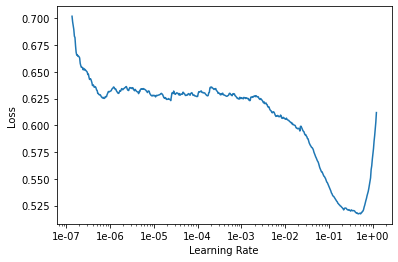

In [ ]:
learn_fn.recorder.plot(skip_end=25)

In [ ]:
learn_fn.fit_one_cycle(4, 4e-2,moms=(0.8,0.7),
                       callbacks=[SamplingCB2(learn_fn,num_samples=1000,objective_mols=obj_ref),
                                   SaveModelCallback(learn_fn, every='improvement',monitor='accuracy', name='bestmodel')])

epoch,train_loss,valid_loss,accuracy,error_rate,Valid,Unique,Novel,time
0,0.474551,0.449156,0.845897,0.154103,0.958000,0.958000,0.925000,02:22
1,0.467781,0.445632,0.847286,0.152714,0.953000,0.953000,0.919000,02:23
2,0.467089,0.442787,0.847816,0.152184,0.970000,0.968000,0.945000,02:19
3,0.465809,0.441456,0.848486,0.151514,0.961000,0.961000,0.931000,02:18


Sampling...
Sample of generated SMILES
['Cc1cc(C)nc(NC(=O)C(=O)c2cn(C(C)(C)C)c3ncccc23)n1', 'Cc1cccc(-c2cc(NC(=O)c3ccc(C(=O)Nc4cccc(C(=O)N5CCN(C)CC5)c4)cc3)cc(C(F)(F)F)c2)c1', 'CC(C)c1ccc2c(c1)CCC1C(C)(CN)CCCC21C', 'COc1ccc(N2CCN(C(=O)c3nc4ccccc4nc3Oc3ccc(O)c(C(=O)O)c3)CC2)cc1', 'COc1cc(C(=O)Nc2ccc(-c3ccc(-c4nc5cc(F)cc(F)c5[nH]4)cc3)cc2)cc(OC)c1OC']
['Cc1cc(C)nc(NC(=O)C(=O)c2cn(C(C)(C)C)c3ncccc23)n1', 'Cc1cccc(-c2cc(NC(=O)c3ccc(C(=O)Nc4cccc(C(=O)N5CCN(C)CC5)c4)cc3)cc(C(F)(F)F)c2)c1', 'CC(C)c1ccc2c(c1)CCC1C(C)(CN)CCCC21C', 'COc1ccc(N2CCN(C(=O)c3nc4ccccc4nc3Oc3ccc(O)c(C(=O)O)c3)CC2)cc1', 'COc1cc(C(=O)Nc2ccc(-c3ccc(-c4nc5cc(F)cc(F)c5[nH]4)cc3)cc2)cc(OC)c1OC']
Better model found at epoch 0 with accuracy value: 0.84589684009552.
Sampling...
Sample of generated SMILES
['CCN(CC)CCNC(=O)c1ccc(N/Cc2cn(-c3ccc(OC)cc3)nc2-c2ccc(F)cc2)cc1', 'Fc1ccc(Nc2ncnc3ccc(NC(=S)Nc4ccccc4Cl)cc23)cc1Cl', 'CCCCCCCCCCCCC(O)C1CCC(C(O)CCCCC(O)CCCCCCCCCC(O)CC2=CC(C)OC2=O)O1', 'NC(=O)c1ccc(-c2cnc3cnc(-c4cccnc4)cn23)cc

In [ ]:
learn_fn.save('fit1');

In [ ]:
learn_fn.freeze_to(-2)

In [ ]:
learn_fn.lr_find(num_it=600)

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.45E-07
Min loss divided by 10: 6.31E-04


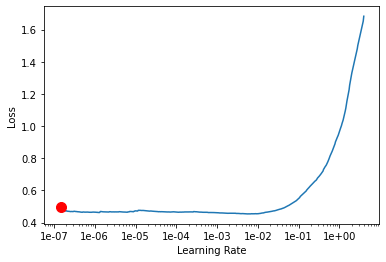

In [ ]:
learn_fn.recorder.plot(suggestion=True)

In [ ]:
learn_fn.fit_one_cycle(3, slice(1e-2/(2.6**4),1e-2),moms=(0.8,0.7),
                        callbacks=[SamplingCB2(learn_fn,num_samples=1000,objective_mols=obj_ref),
                                   SaveModelCallback(learn_fn, every='improvement', 
                                                     monitor='accuracy', name='bestmodel')])

epoch,train_loss,valid_loss,accuracy,error_rate,Valid,Unique,Novel,time
0,0.418731,0.396142,0.862717,0.137283,0.983000,0.952000,0.818000,02:33
1,0.380107,0.368816,0.871490,0.128510,0.986000,0.945000,0.735000,02:33
2,0.360735,0.360141,0.874757,0.125243,0.981000,0.955000,0.728000,02:33


Sampling...
Sample of generated SMILES
['CC(C)(C)c1ccc(Nc2ncnc3ccc(NC(=O)Nc4cccc(Cl)c4)cc23)cc1', 'COc1cc2c(Oc3ccc(NS(=O)(=O)c4cncn4C)cc3F)ccnc2cc1OCCCN1CCN(C)CC1', 'CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cc(NC(=O)c4ccnc(N5CCCC5)c4)cnc3-c3cccc(NCCN4CCOCC4)c3)cc2)no1', 'Cc1ccc(NC(=O)c2cccc(C(F)(F)F)c2)cc1-c1cnc(O[C@H](C)(C)C)c(N2CCOCC2)c1', 'CC(C)S(=O)(=O)Nc1ccc(CNC(=O)Nc2cc3[nH]nc(-c4ccnc(C(F)(F)F)c4)c3cn2)cc1']
['CC(C)(C)c1ccc(Nc2ncnc3ccc(NC(=O)Nc4cccc(Cl)c4)cc23)cc1', 'COc1cc2c(Oc3ccc(NS(=O)(=O)c4cncn4C)cc3F)ccnc2cc1OCCCN1CCN(C)CC1', 'CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cc(NC(=O)c4ccnc(N5CCCC5)c4)cnc3-c3cccc(NCCN4CCOCC4)c3)cc2)no1', 'CC(C)S(=O)(=O)Nc1ccc(CNC(=O)Nc2cc3[nH]nc(-c4ccnc(C(F)(F)F)c4)c3cn2)cc1', 'O=C(Nc1ccccc1)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5ccc(-c6ccccc6)cc5)CC4)c3n2)cc1']
Better model found at epoch 0 with accuracy value: 0.8627166748046875.
Sampling...
Sample of generated SMILES
['CC(C)Nc1nccc(-c2nc(C3CC3)[nH]c2-c2cccc(NS(=O)(=O)C(C)C)c2)n1', 'O=C(Nc1ccc(Oc2ccnc3[nH]ccc23)c(F)c1)c1n

In [ ]:
learn_fn.save('fit2')

In [ ]:
learn_fn.load('fit2');
learn_fn.unfreeze()

In [ ]:
learn_fn.lr_find(num_it=600)

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


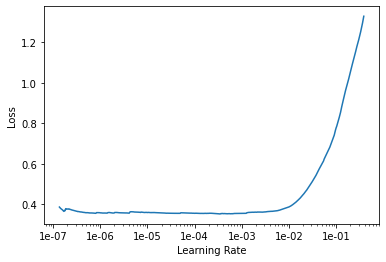

In [ ]:
learn_fn.recorder.plot()

In [ ]:
learn_fn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3),moms=(0.8,0.7),
                        callbacks=[SamplingCB2(learn_fn,num_samples=1000,objective_mols=obj_ref),
                                   SaveModelCallback(learn_fn, every='improvement', 
                                                     monitor='accuracy', name='bestmodel')])

epoch,train_loss,valid_loss,accuracy,error_rate,Valid,Unique,Novel,time
0,0.358883,0.358141,0.875621,0.124379,0.987000,0.935000,0.674000,02:40
1,0.349450,0.356334,0.876123,0.123877,0.986000,0.959000,0.688000,02:39


Sampling...
Sample of generated SMILES
['Cc1cc(-c2nc(-c3ccc(C(=O)NCC4CCCN4)cc3)c(-c3ccncn3)[nH]2)ccc1F', 'CN(C)C(=O)[C@H]1CCN(c2ccc(-c3ccc4[nH]c5nccc(-c6ccc(Oc7ccccc7C(F)(F)F)cc6)c5c4c3)cc2)CC1', 'COc1cc(-c2cnn(C)c2)ccc1Nc1ncc2ccnc(N3CCC4(COC4)C3)c2n1', 'Cn1cnc2cc(-c3ccc(N4CCOCC4)cc3)nc(NC3CC3)c2c1=O', 'CC(Nc1ncnc2c(C(N)=O)cccc12)c1cccc(NC(=O)c2cccc(C(F)(F)F)c2)c1']
['Cc1cc(-c2nc(-c3ccc(C(=O)NCC4CCCN4)cc3)c(-c3ccncn3)[nH]2)ccc1F', 'CN(C)C(=O)[C@H]1CCN(c2ccc(-c3ccc4[nH]c5nccc(-c6ccc(Oc7ccccc7C(F)(F)F)cc6)c5c4c3)cc2)CC1', 'COc1cc(-c2cnn(C)c2)ccc1Nc1ncc2ccnc(N3CCC4(COC4)C3)c2n1', 'Cn1cnc2cc(-c3ccc(N4CCOCC4)cc3)nc(NC3CC3)c2c1=O', 'CC(Nc1ncnc2c(C(N)=O)cccc12)c1cccc(NC(=O)c2cccc(C(F)(F)F)c2)c1']
Better model found at epoch 0 with accuracy value: 0.875621497631073.
Sampling...
Sample of generated SMILES
['Cc1cc(NC(=O)c2cccc(C(F)(F)F)c2)ccc1-c1cc(C2CCC(=O)NC2)ccc1F', 'COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCCC4CO)nc3n2)cc1CO', 'CN(C)CCCn1cc(C2=C(n3ccc4ncccc43)C(=O)NC2=O)c2ccccc21', 'Nc1ncc(C2CC

In [ ]:
learn_fn.save('fit3')

In [ ]:
learn_fn.save_encoder('finetuned_encoder')

In [ ]:
learn_fn.validate()

[0.3529547, tensor(0.8764), tensor(0.1236)]

In [ ]:
learn_fn.export('kinase_generative.pkl')

In [ ]:
!tar -cvf drive/My\ Drive/DDPlarform/LM-kinase.tar.gz generative_model/*

generative_model/bestmodel.pth
generative_model/data_fn.pkl
generative_model/finetuned_encoder.pth
generative_model/fit1.pth
generative_model/fit2.pth
generative_model/fit3.pth
generative_model/history.csv
generative_model/kinase_generative.pkl
generative_model/tmp.pth


###**Validation**

In [ ]:
v,n,u = validation(learn_fn,data_fn,sampling_temperatures,5,2000,ref=list(full.processed_smiles),maxsize=130)

In [ ]:
val_df = pd.DataFrame(v,columns=['Temp_{}'.format(i) for i in sampling_temperatures])
nov_df = pd.DataFrame(n,columns=['Temp_{}'.format(i) for i in sampling_temperatures])
unq_df = pd.DataFrame(u,columns=['Temp_{}'.format(i) for i in sampling_temperatures])


In [ ]:
nov_df

,Temp_0.2,Temp_0.5,Temp_0.6,Temp_0.7,Temp_0.75,Temp_0.8,Temp_1.0,Temp_1.2
0,8.75,48.55,59.60,65.70,71.15,74.75,81.50,76.45
1,9.10,48.65,59.30,67.65,71.60,74.15,81.35,76.15
2,9.00,46.65,59.50,67.55,72.00,73.40,82.10,76.55
3,8.50,47.20,59.25,66.25,70.70,74.70,79.55,75.40
4,8.90,48.05,57.65,67.45,69.85,74.05,81.85,75.95


In [ ]:
unq_df

,Temp_0.2,Temp_0.5,Temp_0.6,Temp_0.7,Temp_0.75,Temp_0.8,Temp_1.0,Temp_1.2
0,13.15,73.50,87.60,92.00,93.55,95.55,92.95,81.55
1,13.35,73.00,85.35,93.65,94.45,95.30,92.70,80.60
2,13.65,71.60,85.55,92.60,94.95,94.35,92.00,81.10
3,13.50,73.25,85.80,92.55,94.80,94.95,92.40,80.00
4,13.20,72.65,84.20,92.20,94.25,94.90,92.85,81.05


In [ ]:
val_df

,Temp_0.2,Temp_0.5,Temp_0.6,Temp_0.7,Temp_0.75,Temp_0.8,Temp_1.0,Temp_1.2
0,100.00,99.85,99.50,98.70,98.95,98.35,93.35,81.65
1,99.95,99.60,99.45,99.10,98.15,98.20,93.05,80.65
2,99.95,99.55,99.25,98.70,98.85,97.90,92.45,81.25
3,100.00,99.70,99.05,99.25,99.05,98.05,92.90,80.05
4,99.95,99.65,99.35,98.90,98.15,97.90,93.10,81.10


In [ ]:
val_df.to_csv(COV/'finetuned_validity.csv',index=False)
nov_df.to_csv(COV/'finetuned_novelty.csv',index=False)
unq_df.to_csv(COV/'finetuned_uniqueness.csv',index=False)

In [ ]:
!tar -cvf drive/My\ Drive/DDPlarform/LM-kinase.tar.gz generative_model/*
#!tar -rvf drive/My\ Drive/DDPlarform/LM-kinase.tar.gz generative_model/finetuned_novelty.csv
#!tar -rvf drive/My\ Drive/DDPlarform/LM-kinase.tar.gz generative_model/finetuned_uniqueness.csv

generative_model/bestmodel.pth
generative_model/data_fn.pkl
generative_model/finetuned_encoder.pth
generative_model/finetuned_novelty.csv
generative_model/finetuned_uniqueness.csv
generative_model/finetuned_validity.csv
generative_model/fit1.pth
generative_model/fit2.pth
generative_model/fit3.pth
generative_model/history.csv
generative_model/kinase_generative.pkl
generative_model/tmp.pth


In [ ]:
classraw = pd.read_csv('/content/drive/My Drive/DDPlarform/chembl27_kinases_filtered.csv',sep=';')
classraw.head(2)

,doc_id,standard_value,standard_type,standard_relation,pchembl,molregno,canonical_smiles,chembl_id,tid,target_chembl_id,l1,l2,l3,confidence_score,act,processed_smiles
0,61350,690.0,IC50,=,6.16,148,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,CHEMBL6246,9,CHEMBL203,Enzyme,Kinase,Protein Kinase,9,Inactive,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23
1,61350,340.0,IC50,=,6.47,148,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,CHEMBL6246,35,CHEMBL1981,Enzyme,Kinase,Protein Kinase,9,Inactive,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23


In [ ]:
from sklearn.model_selection import train_test_split
def split_data(data):
 
  TRAIN = []
  TEST = []
  VALID = []
  targets = data['target_chembl_id'].unique()
  print('Number of targets: {}'.format(len(targets)))
  for t in targets:
    datat = data.loc[data['target_chembl_id']==t]
    train,test = train_test_split(datat,train_size=0.80,stratify=datat['act'],random_state=76)
    test,valid = train_test_split(test,train_size=0.50,stratify=test['act'],random_state=76)
    train['bin'] = np.where(train['act']=='Active',1,0)
    test['bin'] = np.where(test['act']=='Active',1,0)
    valid['bin'] = np.where(valid['act']=='Active',1,0)
    TRAIN.append(train)
    TEST.append(test)
    VALID.append(valid)

  return pd.concat(TRAIN,axis=0),pd.concat(TEST,axis=0),pd.concat(VALID,axis=0)

In [ ]:
train,test,valid = split_data(classraw)

Number of targets: 92


In [ ]:
tr_targets = set(train['target_chembl_id'])
tst_targets = set(test['target_chembl_id'])
vl_targets = set(valid['target_chembl_id'])
len(tr_targets),len(tst_targets),len(vl_targets)

(92, 92, 92)

In [ ]:
train.to_csv('/content/drive/My Drive/DDPlarform/chembl27_kinases_classification_train.csv',sep=';',index=False)
test.to_csv('/content/drive/My Drive/DDPlarform/chembl27_kinases_classification_test.csv',sep=';',index=False)
valid.to_csv('/content/drive/My Drive/DDPlarform/chembl27_kinases_classification_valid.csv',sep=';',index=False)

In [ ]:
def gen_dict(group):
    return {tid: act  for tid, act in zip(group['target_chembl_id'], group['bin'])}
def pivot_data(data):
  group = data.groupby('chembl_id')
  temp = pd.DataFrame(group.apply(gen_dict))
  mt_df = pd.DataFrame(temp[0].tolist())
  mt_df['chembl_id'] = temp.index
  mt_df = mt_df.where((pd.notnull(mt_df)), -1)

  structs = data[['chembl_id', 'processed_smiles']].drop_duplicates(subset='chembl_id')

  # drop mols not sanitizing on rdkit
  structs['romol'] = structs.apply(lambda row: Chem.MolFromSmiles(row['processed_smiles']), axis=1)
  structs = structs.dropna()
  del structs['romol']

  # add the structures to the final df
  mt_df = pd.merge(structs, mt_df, how='inner', on='chembl_id')
  return mt_df

In [ ]:
train_pivot = train.pivot_table(index=['chembl_id','processed_smiles'],columns=['target_chembl_id'],values='bin').reset_index()#pivot_data(train)

In [ ]:
valid_pivot = pivot_data(valid)
test_pivot = pivot_data(test)

In [ ]:
train['is_valid'] = False
valid['is_valid'] = True
train_valid = pd.concat([train,valid],axis=0)

In [ ]:
np.unique(train_pivot[cols].isnull().all().reset_index()[0].values) # Not column with all values empty

array([False])

In [ ]:
test_pivot.to_csv('/content/drive/My Drive/DDPlarform/chembl27_kinases_classification_test_pivot.csv',sep=';',index=False)
train_valid.to_csv('/content/drive/My Drive/DDPlarform/chembl27_kinases_classification_train_valid_pivot.csv',sep=';',index=False)

# **Classifier**

In [ ]:
test_pivot = pd.read_csv('/content/drive/My Drive/DDPlarform/chembl27_kinases_classification_test_pivot.csv',sep=';')
train_valid = pd.read_csv('/content/drive/My Drive/DDPlarform/chembl27_kinases_classification_train_valid_pivot.csv',sep=';')

In [ ]:
!tar -xvf drive/My\ Drive/DDPlarform/LM-kinase.tar.gz 
#!tar -xvf /content/drive/My\ Drive/Generative/sars/scaffold_splits.tar.gz
#!tar -xvf /content/drive/My\ Drive/Generative/sars/random_splits.tar.gz

generative_model/bestmodel.pth
generative_model/data_fn.pkl
generative_model/finetuned_encoder.pth
generative_model/finetuned_novelty.csv
generative_model/finetuned_uniqueness.csv
generative_model/finetuned_validity.csv
generative_model/fit1.pth
generative_model/fit2.pth
generative_model/fit3.pth
generative_model/history.csv
generative_model/kinase_generative.pkl
generative_model/tmp.pth


In [ ]:
data_fn = load_data(COV,file='data_fn.pkl')
vocab = data_fn.vocab
learn_fn = load_learner(COV,file='kinase_generative.pkl')

In [ ]:
#!tar -xvf /content/drive/My\ Drive/Generative/sars/scaffold_splits.tar.gz
#!python chemprop-master/scripts/split_data.py --data_path /content/drive/My\ Drive/Generative/data/AID_1706_misc_combined_processed.csv --save_dir sars_scaffolds_splits/fold5 --seed 5 --smiles_column Smiles --split_type scaffold_balanced
#!python chemprop-master/predict.py --test_path /content/cov_finetuned_V2_4_sample50K.csv --checkpoint_path 30.pt --preds_path /content/cov_finetuned_V2_4_sample50K_preds.csv --features_generator rdkit_2d_normalized --no_features_scaling

In [ ]:
#train = pd.read_csv('/content/drive/My Drive/DDPlarform/data/kinase_class_train.csv',sep=';')
#valid = pd.read_csv('/content/drive/My Drive/DDPlarform/data/kinase_class_valid.csv',sep=';')
#test = pd.read_csv('/content/drive/My Drive/DDPlarform/data/kinase_class_test.csv',sep=';')

In [ ]:
#train_valid,test = get_splits(CROSSVAL,'/content/sars_random_splits/train_fold{}.csv'.format(i),
 #                          '/content/sars_random_splits/valid_fold{}.csv'.format(i),
  #                         '/content/sars_random_splits/test_fold{}.csv'.format(i))
#learn_cls = load_learner(Path('/content/classifier/crossvalidation/random{}'.format(i)),'sars_model.pkl')

In [ ]:
#FOLD = Path(CROSSVAL/'scaffold{}'.format(i))
#FOLD.mkdir(parents=True, exist_ok=True)

In [ ]:
tokenizer = Tokenizer(MolTokenizer,pre_rules=[],post_rules=[],special_cases=[PAD,BOS,EOS,UNK])
processors = [TokenizeProcessor(tokenizer=tokenizer, mark_fields=False,include_bos=False),
            NumericalizeProcessor(vocab=vocab)]

In [ ]:
cols = [x for x in train_valid.columns if x.startswith('CHEMBL')]


In [ ]:
src_cls = TextList.from_df(train_valid,path=COVCLS,cols='processed_smiles',processor=processors)
splt_cls = src_cls.split_from_df('is_valid')
lbl_cls = splt_cls.label_from_df(cols,classes=cols)

In [ ]:
data_cls = lbl_cls.databunch()

In [ ]:
xb, yb = data_cls.one_batch()

In [ ]:
def get_weights(data,n):
  '''Get sample weights based on distribution of classes. The minority class gets higher weights
  n: scaling factor'''
  labels = data.train_dl.dataset.y.items
  _, counts = np.unique(labels,return_counts=True)

  weights = tensor([n/counts[i] for i in labels]).float()
  weights = (weights if weights is not None else torch.DoubleTensor((1/counts)[labels]))
  return weights

#weights = get_weights(data_cls,n=1) # Sample weights
#weights,Counter(weights.numpy())
#sampler = WeightedRandomSampler(weights=weights2,num_samples=len(weights2))

#data_cls.train_dl = data_cls.train_dl.new(shuffle=False,sampler=sampler)

mask_value = -1.
labels = np.where(data_cls.train_dl.y.items==-1.,2.,data_cls.train_dl.y.items)
_, counts_all = np.unique(labels,return_counts=True)
weights = tensor([1/counts_all[i.astype(np.int64)] for i in labels]).float()

In [ ]:
weights = (weights if weights is not None else torch.DoubleTensor((1/counts_all)[labels]))

In [ ]:
weights = []
for col in cols:
  c = train_valid[train_valid[col] >= 0.0].shape[0]
  weights.append(1 / c)
weights = np.array(weights)


In [ ]:
criterion = [BCEWithLogitsFlat(weight=w) for x, w in zip(range(len(cols)), tensor(weights).float())]
loss = tensor(0.0)
for j, crit in enumerate(criterion):
  # mask keeping labeled molecules for each task
  mask = yb[:, j] >= 0.0
  if len(yb[:, j][mask]) != 0:
    # the loss is the sum of each task/target loss.
    # there are labeled samples for this task, so we add it's loss
    loss += crit(output[:, j][mask], yb[:, j][mask])

In [ ]:
data_cls.save('data_cls.pkl')
data_cls.show_batch()

text,target
xxbos C C ( C ) = C C C / C ( C ) = C / C [C@] 1 2 C ( = O ) C ( C ( = O ) c 3 c c c ( O ) c ( O ) c 3 ) = C ( O ) [C@] ( C / C = C ( \ C ) C C C = C,
xxbos C C [C@H] ( C ) [C@H] ( N C ( = O ) [C@H] ( C C C ( = O ) O ) N C ( = O ) [C@H] ( C C C ( = O ) O ) N C ( = O ) [C@H] ( C c 1 c c c ( O ) c c 1 ) N C ( = O ),
xxbos N # C C C n 1 c c ( C N 2 C C N ( c 3 c c ( C ( = O ) N c 4 c c c 5 c ( c 4 ) - c 4 c ( c ( C ( N ) = O ) n n 4 - c 4 c c c ( F ) c c 4 ),CHEMBL1991
xxbos C O C ( = O ) N 1 C C N ( C ( C ) ( C ) / C = C ( \ C # N ) C ( = O ) N 2 C C C [C@H] ( n 3 n c ( - c 4 c c c ( O c 5 c c c c c 5 ) c c 4 F ),CHEMBL5251
xxbos C C [C@H] ( C ) [C@H] ( N C ( = O ) [C@H] ( C C C ( = O ) O ) N C ( = O ) [C@H] ( C C C ( = O ) O ) N C ( = O ) [C@H] ( C c 1 c c c ( O P ( = O ) ( O ) O ) c,


In [ ]:
class Masked_BCE2(nn.Module):
    def __init__(self, weight: Optional[Tensor] = None, size_average=None, reduce=None, reduction: str = 'mean',
                 pos_weight: Optional[Tensor] = None):
        super().__init__()
        self.weight = weight
        self.size_average = size_average
        self.pos_weight = pos_weight
        self.reduce = reduce
        self.reduction = reduction
        
    def forward(self, inputs, targets, **kwargs):
      loss = torch.tensor(0.0)
      for j in range(targets.shape[0]):
        mask = ~targets[j, :].eq(-1)
        loss = BCEWithLogitsFlat()(inputs[j, :][mask], targets[j, :][mask]) + loss
      return loss/targets.shape[1]
      
class Masked_BCE1(nn.Module):
    def __init__(self, weight: Optional[Tensor] = None, size_average=None, reduce=None, reduction: str = 'mean',
                 pos_weight: Optional[Tensor] = None):
        super().__init__()
        self.weight = weight
        self.size_average = size_average
        self.pos_weight = pos_weight
        self.reduce = reduce
        self.reduction = reduction
        
    def forward(self, inputs, targets, **kwargs):
      loss = torch.tensor(0.0)
      nb = len(targets)
      for j in range(targets.shape[1]):
        mask = targets[:, j] >= 0.0
        if len(targets[:, j][mask]) != 0:
          loss = BCEWithLogitsFlat()(inputs[:, j][mask], targets[:, j][mask]) + loss
      return loss/nb

class Masked_BCE3(nn.Module):
  def __init__(self,mask_value=-1.0,targets=cols,weights=weights):
    super().__init__()
    self.mask_value = mask_value
    self.targets = targets
    self.n_targets = len(targets)
    self.weights = weights

  def forward(self, inputs, target, **kwargs):
    criterion = [BCEWithLogitsFlat(weight=w) for x, w in zip(range(self.n_targets), tensor(self.weights).float())]
    #print(inputs)
    loss = tensor(0.0)
    for j, crit in enumerate(criterion):
      # mask keeping labeled molecules for each task
      mask = target[:, j] >= 0.0
      if len(target[:, j][mask]) != 0:
        # the loss is the sum of each task/target loss.
        # there are labeled samples for this task, so we add it's loss        
        loss = crit(inputs[:, j][mask], target[:, j][mask]) + loss
    return loss

def mcc_masked(y_pred:Tensor, y_true:Tensor,mask_value:int=-1., thresh:float=0.5, sigmoid:bool=True,targets:Collection=cols)->Rank0Tensor:
  "Computes the MCC between `preds` and `targets`"
  y_trues = []
  y_preds = []
  
  if sigmoid: y_pred = y_pred.sigmoid()
  y_pred = (y_pred>thresh).long()
  for j, name in enumerate(targets):
    mask = y_true[:, j] >= 0.0
    if len(y_true[:, j][mask]) != 0:
      y_trues.append(y_true[:, j][mask])
      y_preds.append(y_pred[:, j][mask])
       # mcc = matthews_corrcoef(y_true[:, j][mask].cpu(), y_pred[:, j][mask].cpu()) + mcc

  y_trues = torch.cat(y_trues)
  y_preds = torch.cat(y_preds)

  ytr.append(y_trues)
  ypr.append(y_preds)

  mcc = tensor(matthews_corrcoef(y_trues.cpu().numpy(), y_preds.cpu().numpy())).float()

  return mcc

In [ ]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
mcc_score = partial(mcc_masked, thresh=0.5)
metrics=[mcc_masked]#[Recall(pos_label=1),Recall(pos_label=0),Precision(pos_label=1),MatthewsCorreff(),AUCPR()]
cb = [partial(CSVLogger,append=True)]


In [ ]:
learn = text_classifier_learner(data_cls, AWD_LSTM,pretrained=False,config=config_cls,drop_mult=0.2,
                                model_dir=Path('.'),
                                callback_fns=cb,loss_func=Masked_BCE1(),
                                metrics=metrics).load_encoder('/content/generative_model/finetuned_encoder');
learn.freeze()


In [ ]:
learn.lr_find(num_it=600)

epoch,train_loss,valid_loss,mcc_masked,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


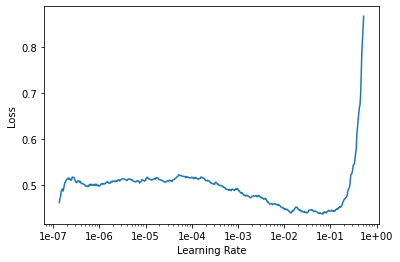

In [ ]:
learn.recorder.plot(skip_end=15)

In [ ]:
learn.fit_one_cycle(5, slice(2e-3/(2.6**4),2e-3), moms=(0.8,0.7),callbacks=[SaveModelCallback(learn,monitor='mcc_masked',name='bestmodel')])

epoch,train_loss,valid_loss,mcc_masked,time
0,0.376505,0.156753,0.414273,01:48
1,0.341391,0.146253,0.464542,01:48
2,0.328708,0.141254,0.495106,01:48
3,0.299427,0.137588,0.509941,01:48
4,0.286381,0.137017,0.509926,01:47


Better model found at epoch 0 with mcc_masked value: 0.4142731726169586.
Better model found at epoch 1 with mcc_masked value: 0.4645422101020813.
Better model found at epoch 2 with mcc_masked value: 0.49510636925697327.
Better model found at epoch 3 with mcc_masked value: 0.5099408030509949.


In [ ]:
learn.save('fit1')

In [ ]:
learn.load('fit1');

In [ ]:
learn.freeze_to(-2)

In [ ]:
learn.lr_find(num_it=600)

epoch,train_loss,valid_loss,mcc_masked,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


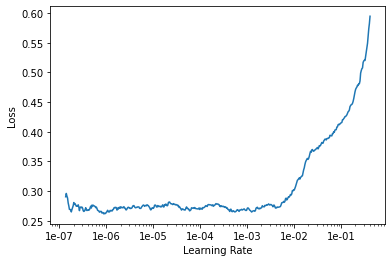

In [ ]:
learn.recorder.plot(skip_end=10)

In [ ]:
learn.fit_one_cycle(6, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7),callbacks=[SaveModelCallback(learn,monitor='mcc_masked',name='bestmodel')])

epoch,train_loss,valid_loss,mcc_masked,time
0,0.285478,0.138816,0.519596,01:55
1,0.290936,0.138500,0.518232,01:51
2,0.279684,0.132332,0.536267,01:54
3,0.254055,0.130915,0.551414,01:55
4,0.237170,0.130105,0.556203,01:52
5,0.225277,0.130085,0.557957,01:52


Better model found at epoch 0 with mcc_masked value: 0.5195960998535156.
Better model found at epoch 2 with mcc_masked value: 0.536266565322876.
Better model found at epoch 3 with mcc_masked value: 0.5514141917228699.
Better model found at epoch 4 with mcc_masked value: 0.5562034249305725.
Better model found at epoch 5 with mcc_masked value: 0.5579574108123779.


In [ ]:
learn.save('fit2')

In [ ]:
learn.load('fit2');

In [ ]:
learn.freeze_to(-3)

In [ ]:
learn.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7),callbacks=[SaveModelCallback(learn,monitor='mcc_masked',name='bestmodel')])

epoch,train_loss,valid_loss,mcc_masked,time
0,0.234766,0.134132,0.551622,02:04
1,0.235918,0.130442,0.558590,02:01
2,0.214145,0.129669,0.577453,02:00
3,0.197284,0.129269,0.578517,02:00


Better model found at epoch 0 with mcc_masked value: 0.5516223311424255.
Better model found at epoch 1 with mcc_masked value: 0.5585899949073792.
Better model found at epoch 2 with mcc_masked value: 0.5774529576301575.
Better model found at epoch 3 with mcc_masked value: 0.5785174369812012.


In [ ]:
learn.save('fit3')

In [ ]:
learn.load('fit3');
learn.unfreeze();

In [ ]:
learn.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7),callbacks=[SaveModelCallback(learn,monitor='mcc_masked',name='bestmodel')])

epoch,train_loss,valid_loss,mcc_masked,time
0,0.204924,0.132500,0.562784,02:10
1,0.215570,0.133978,0.565579,02:11
2,0.195199,0.132554,0.575981,02:10
3,0.162561,0.132709,0.571924,02:13


Better model found at epoch 0 with mcc_masked value: 0.5627838373184204.
Better model found at epoch 1 with mcc_masked value: 0.5655791163444519.
Better model found at epoch 2 with mcc_masked value: 0.5759810209274292.


In [ ]:
learn.save('fit4')

In [ ]:
#learn.load('fit4');
learn.validate()

[0.12907319, tensor(0.0603)]

In [ ]:
learn.fit_one_cycle(6, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7),callbacks=[SaveModelCallback(learn,monitor='mcc_masked',name='bestmodel')])

epoch,train_loss,valid_loss,mcc_masked,time
0,0.164547,0.135387,0.576994,02:15
1,0.195788,0.140671,0.569276,02:16
2,0.187184,0.139009,0.571644,02:16
3,0.176278,0.139293,0.582603,02:18
4,0.133000,0.141072,0.582924,02:15
5,0.132051,0.141394,0.584821,02:16


Better model found at epoch 0 with mcc_masked value: 0.5769940614700317.
Better model found at epoch 3 with mcc_masked value: 0.5826025009155273.
Better model found at epoch 4 with mcc_masked value: 0.5829238295555115.
Better model found at epoch 5 with mcc_masked value: 0.5848205089569092.


In [ ]:
learn.save('fit5')

## **Classifier validation**

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix(return_fig=True,figsize=(8,8))
plt.grid(which='minor',color='k')
plt.tight_layout()
plt.savefig(FOLD/'confusionmatrix.png',dpi=300)

In [ ]:
valid_probas,_ = learn.get_preds()
valid_probas = valid_probas.sigmoid()
y_valid = data_cls.valid_ds.y.items
preds = np.where(valid_probas>=0.5,1,0)
#thresh = 0.2
#labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in valid_probas]
##preds = np.where(valid_probas.argmax(-1)==0,1,0)
#yvalid = np.where(data_cls.valid_ds.y.items==1,0,1)
#print(Counter(yvalid),Counter(preds))

In [ ]:
 ms = []
 for i,name in enumerate(cols):
  tg0 = y_valid[:, i]
  mask = tg0>=0
  tg0 = tg0[mask].astype(np.int64)
  pred0 = preds[:, i][mask]
  mcc = matthews_corrcoef(tg0,pred0)
  #print(name,mcc,tg0.shape)
  ms.append(mcc)
np.mean(ms)

0.5798398980663059

In [ ]:
#valid_results = model_metrics(y=yvalid,preds=preds,proba=valid_probas[:,0],save_dir=PATH)
valid_results=  model_metrics(y=validset,preds=preds,proba=probas[:,0],save_dir=FOLD,dt='Validation')

In [ ]:
learn.export(file='prototype_model.pkl')

## **Test sets**

In [ ]:
learn = load_learner(path=COVCLS,file='prototype_model.pkl')

In [ ]:

train_valid,test = get_splits(CROSSVAL,'/content/sars_scaffolds_splits/fold{}/train.csv'.format(i),
                           '/content/sars_scaffolds_splits/fold{}/val.csv'.format(i),
                           '/content/sars_scaffolds_splits/fold{}/test.csv'.format(i))
learn_cls = load_learner(Path('/content/classifier/crossvalidation/scaffold{}'.format(i)),'sars_model.pkl')


5


In [ ]:
y_test = test_pivot[cols].values.astype(np.int64)
y_test 

array([[ 1, -1, -1, -1, ..., -1, -1, -1, -1],
       [ 0, -1, -1, -1, ..., -1, -1, -1, -1],
       [ 1, -1, -1, -1, ..., -1, -1, -1, -1],
       [ 0, -1, -1, -1, ..., -1, -1, -1, -1],
       ...,
       [-1, -1, -1, -1, ..., -1, -1, -1,  0],
       [-1, -1, -1, -1, ..., -1, -1, -1,  1],
       [-1, -1, -1, -1, ..., -1, -1, -1,  0],
       [-1, -1, -1, -1, ..., -1, -1, -1,  1]])

In [ ]:
learn.data.add_test(list(test_pivot.processed_smiles))

In [ ]:
test_probas,_ = learn.get_preds(ds_type=DatasetType.Test)
test_probas = test_probas.sigmoid()
test_preds = np.where(test_probas>=0.5,1,0)

<Figure size 864x576 with 0 Axes>

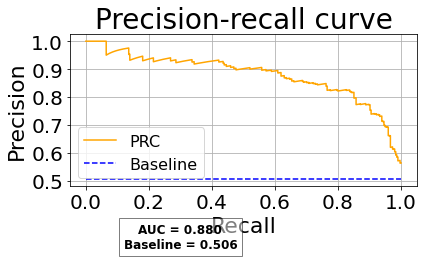

<Figure size 864x576 with 0 Axes>

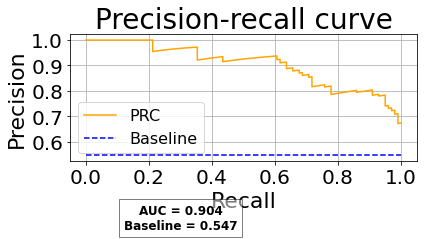

<Figure size 864x576 with 0 Axes>

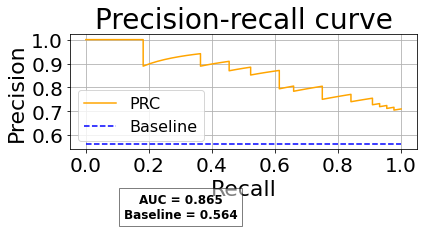

<Figure size 864x576 with 0 Axes>

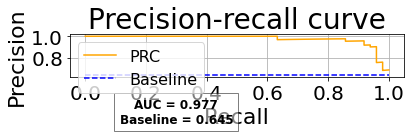

<Figure size 864x576 with 0 Axes>

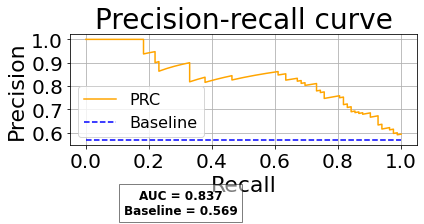

<Figure size 864x576 with 0 Axes>

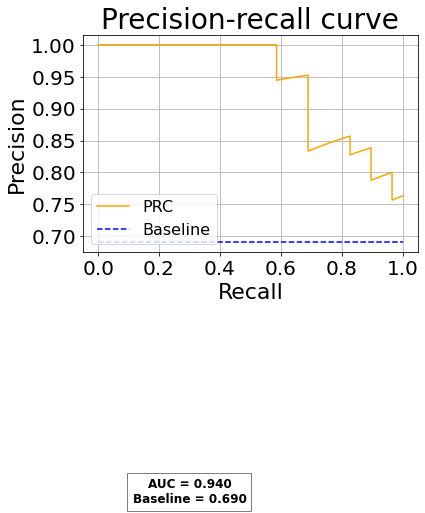

<Figure size 864x576 with 0 Axes>

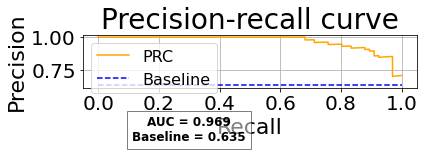

<Figure size 864x576 with 0 Axes>

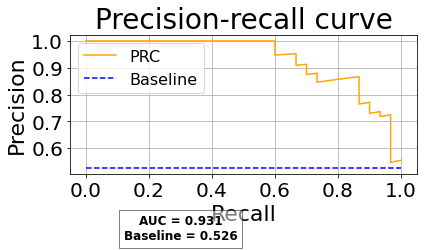

<Figure size 864x576 with 0 Axes>

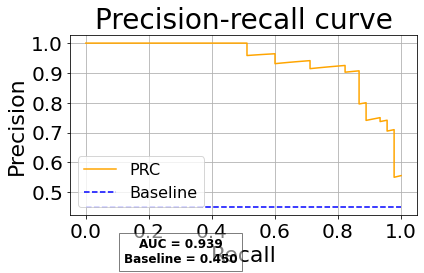

<Figure size 864x576 with 0 Axes>

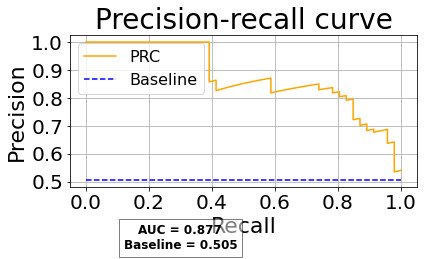

<Figure size 864x576 with 0 Axes>

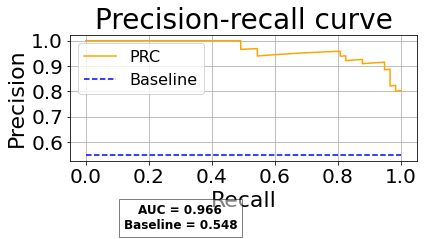

<Figure size 864x576 with 0 Axes>

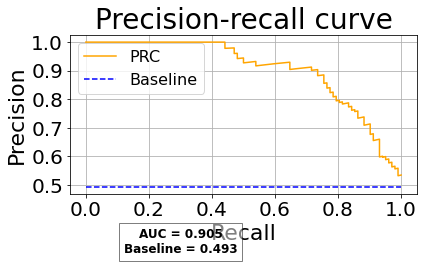

<Figure size 864x576 with 0 Axes>

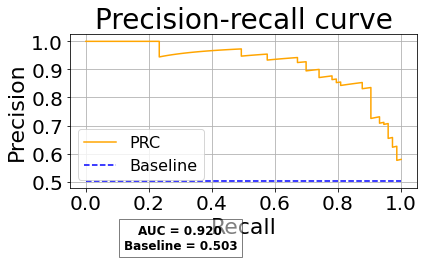

<Figure size 864x576 with 0 Axes>

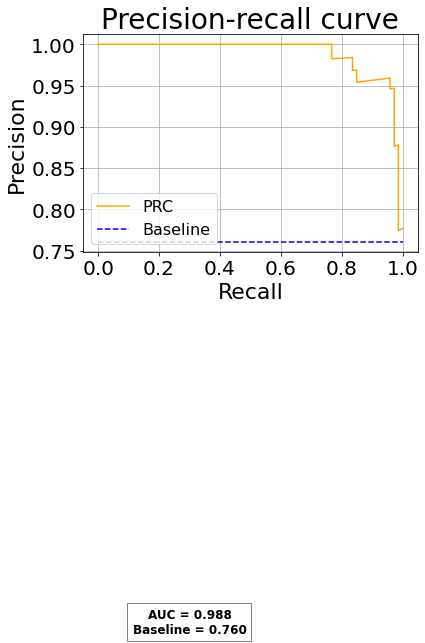

<Figure size 864x576 with 0 Axes>

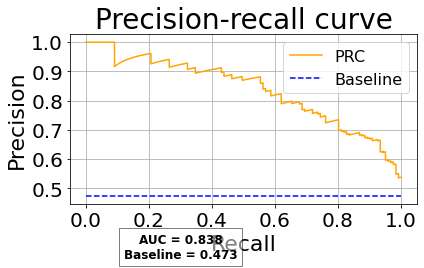

<Figure size 864x576 with 0 Axes>

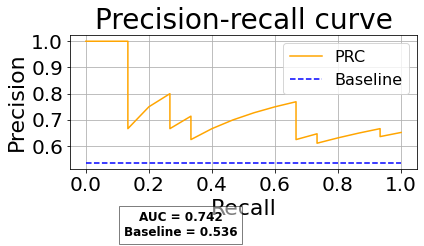

<Figure size 864x576 with 0 Axes>

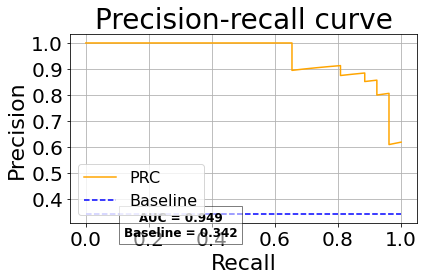

<Figure size 864x576 with 0 Axes>

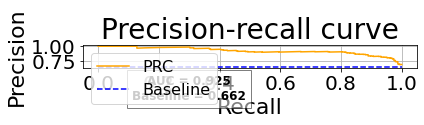

<Figure size 864x576 with 0 Axes>

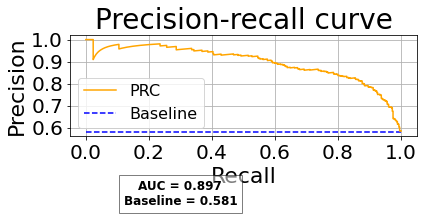

<Figure size 864x576 with 0 Axes>

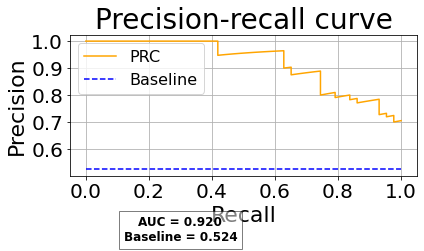

<Figure size 864x576 with 0 Axes>

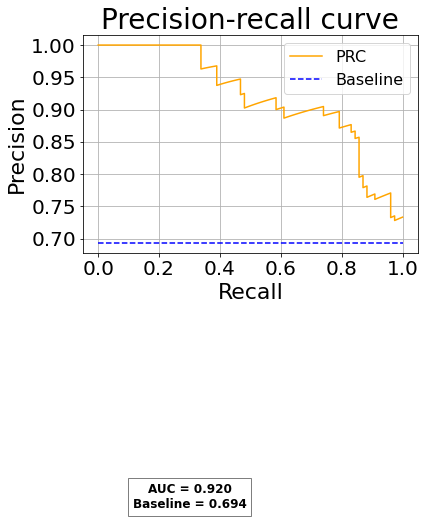

<Figure size 864x576 with 0 Axes>

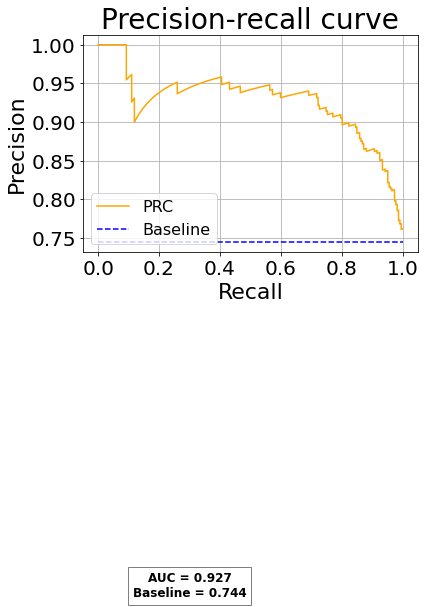

<Figure size 864x576 with 0 Axes>

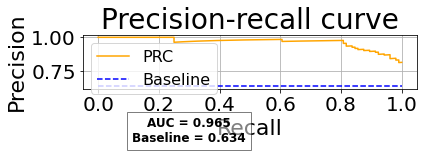

<Figure size 864x576 with 0 Axes>

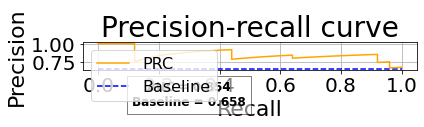

<Figure size 864x576 with 0 Axes>

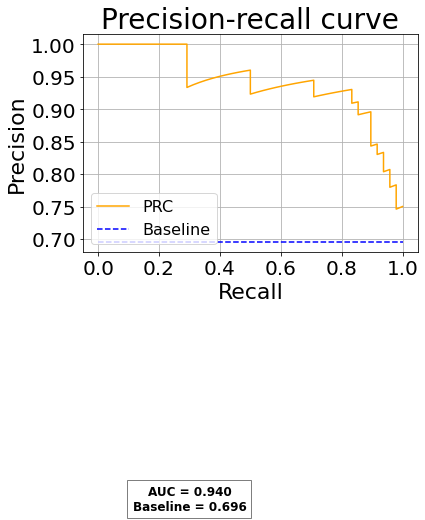

<Figure size 864x576 with 0 Axes>

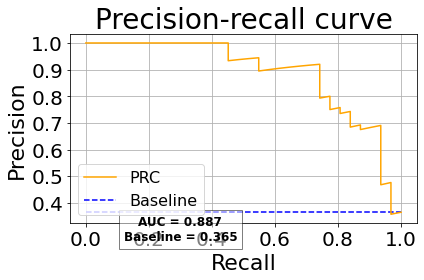

<Figure size 864x576 with 0 Axes>

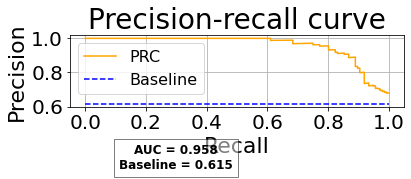

<Figure size 864x576 with 0 Axes>

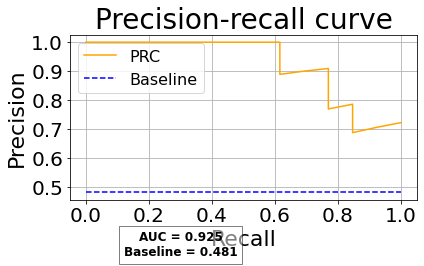

<Figure size 864x576 with 0 Axes>

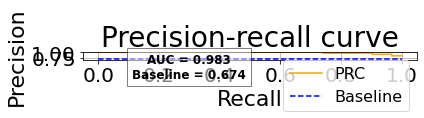

<Figure size 864x576 with 0 Axes>

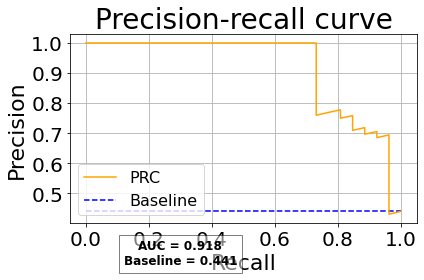

<Figure size 864x576 with 0 Axes>

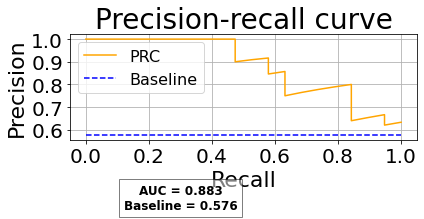

<Figure size 864x576 with 0 Axes>

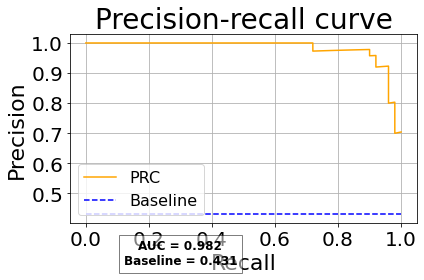

<Figure size 864x576 with 0 Axes>

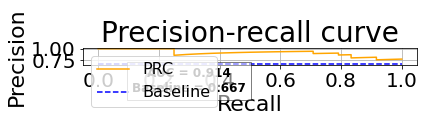

<Figure size 864x576 with 0 Axes>

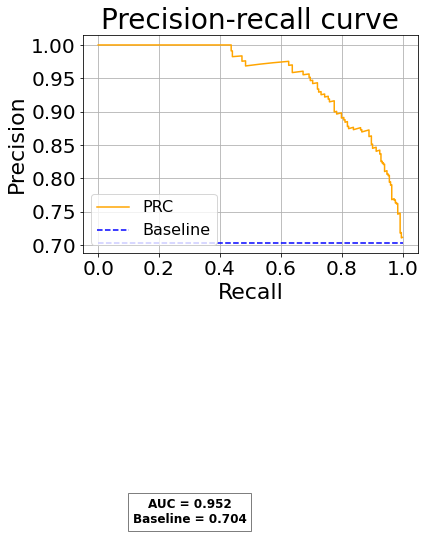

<Figure size 864x576 with 0 Axes>

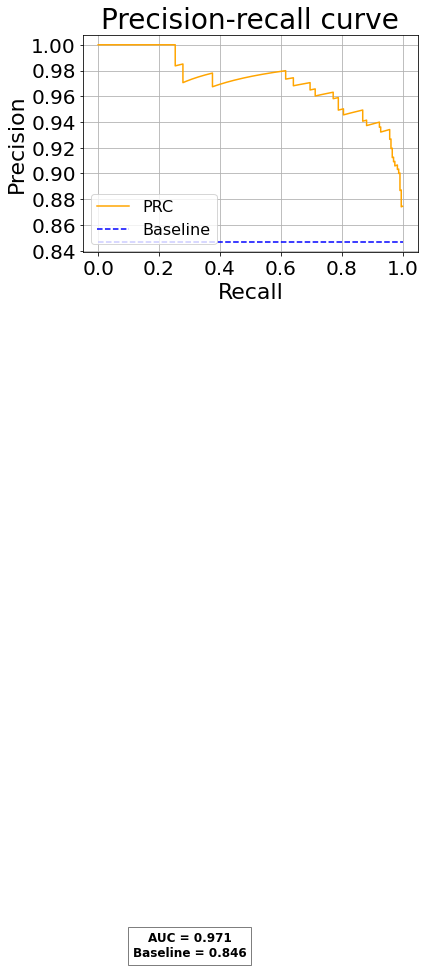

<Figure size 864x576 with 0 Axes>

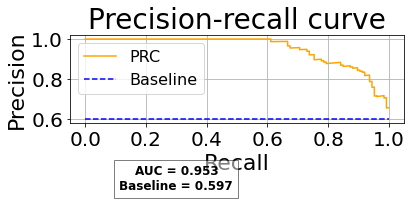

<Figure size 864x576 with 0 Axes>

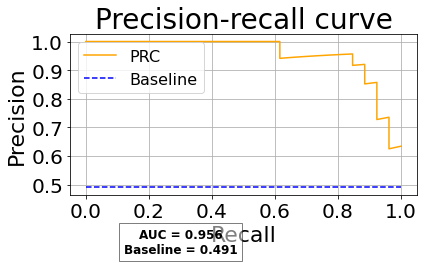

<Figure size 864x576 with 0 Axes>

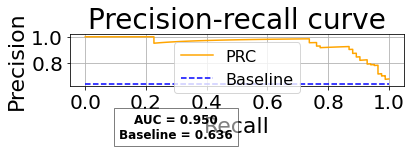

<Figure size 864x576 with 0 Axes>

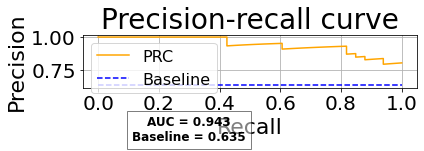

<Figure size 864x576 with 0 Axes>

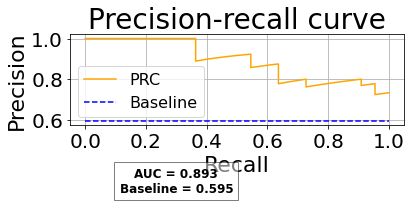

<Figure size 864x576 with 0 Axes>

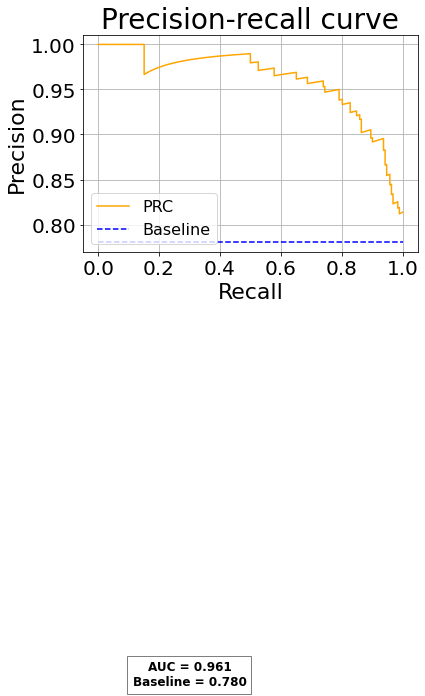

<Figure size 864x576 with 0 Axes>

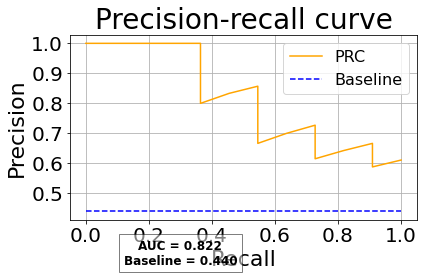

<Figure size 864x576 with 0 Axes>

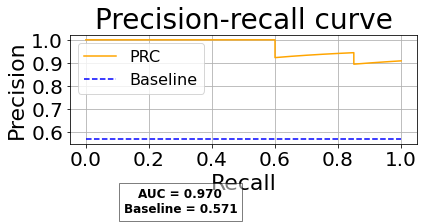

<Figure size 864x576 with 0 Axes>

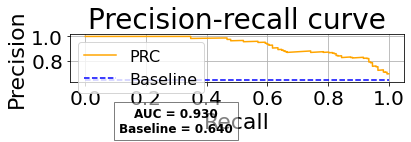

<Figure size 864x576 with 0 Axes>

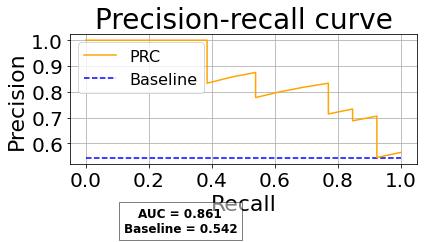

<Figure size 864x576 with 0 Axes>

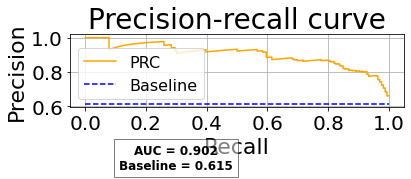

<Figure size 864x576 with 0 Axes>

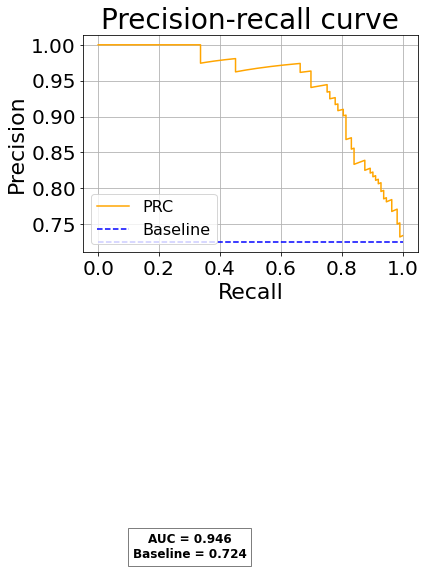

<Figure size 864x576 with 0 Axes>

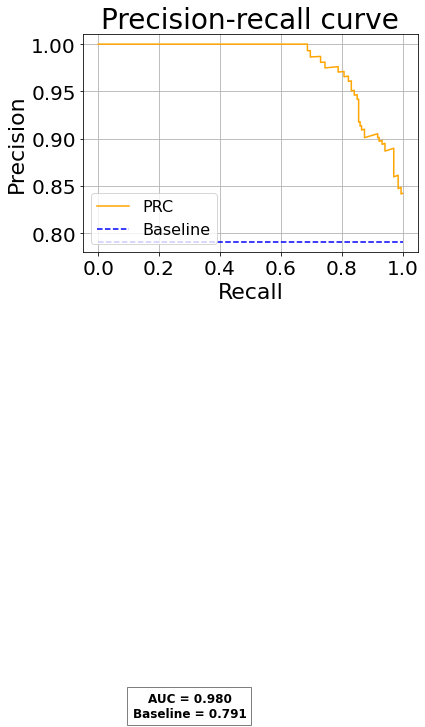

<Figure size 864x576 with 0 Axes>

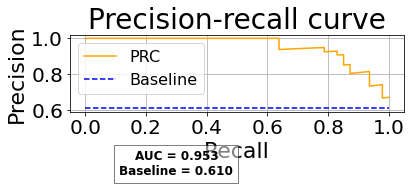

<Figure size 864x576 with 0 Axes>

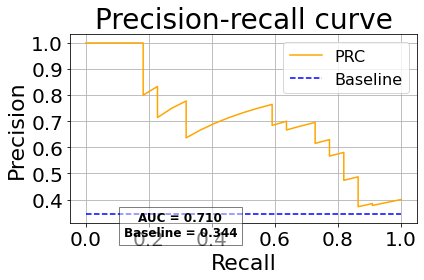

<Figure size 864x576 with 0 Axes>

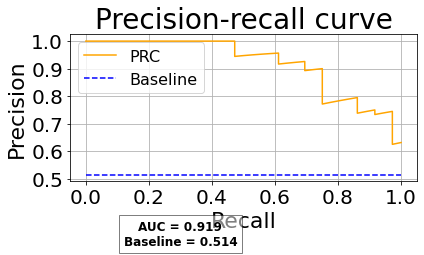

<Figure size 864x576 with 0 Axes>

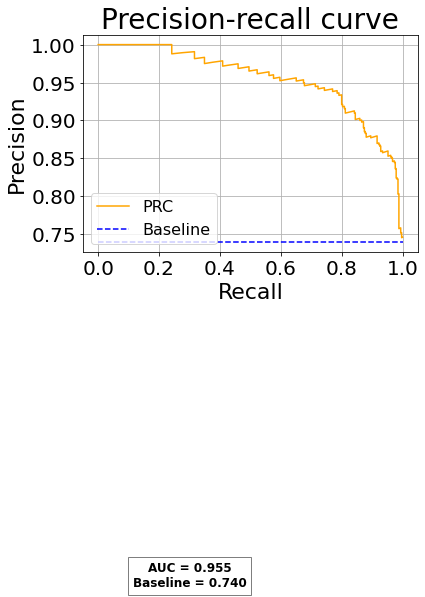

<Figure size 864x576 with 0 Axes>

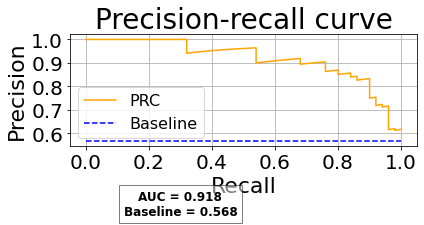

<Figure size 864x576 with 0 Axes>

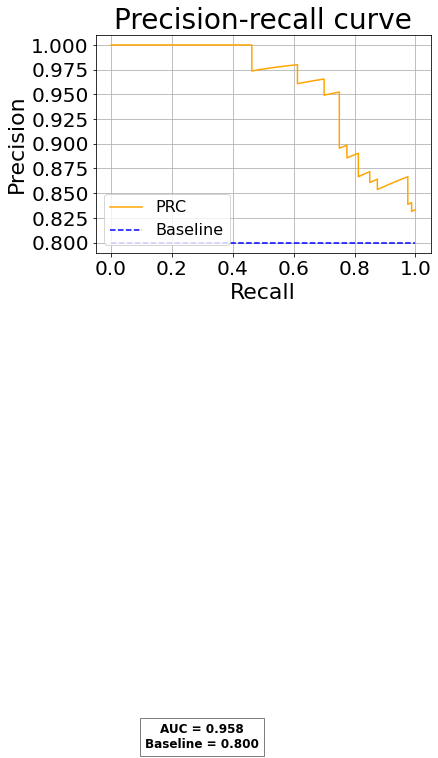

<Figure size 864x576 with 0 Axes>

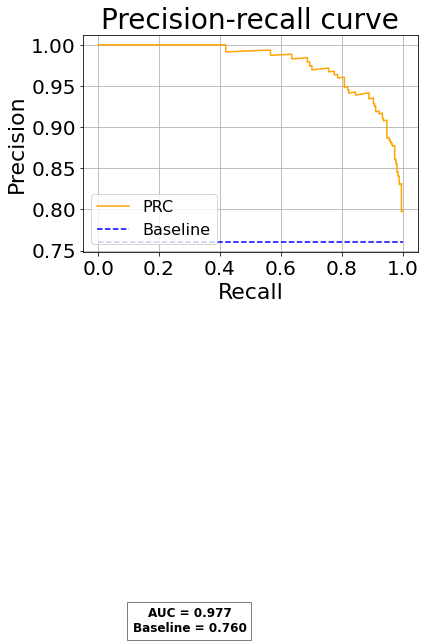

<Figure size 864x576 with 0 Axes>

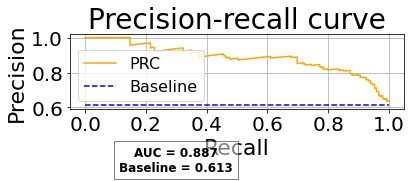

<Figure size 864x576 with 0 Axes>

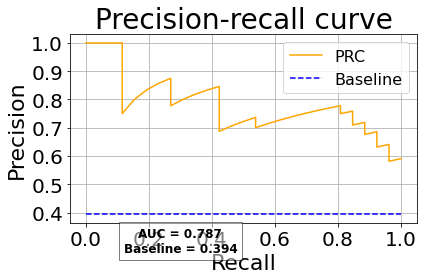

<Figure size 864x576 with 0 Axes>

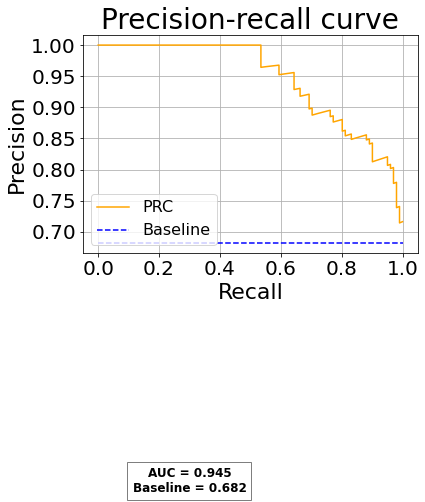

<Figure size 864x576 with 0 Axes>

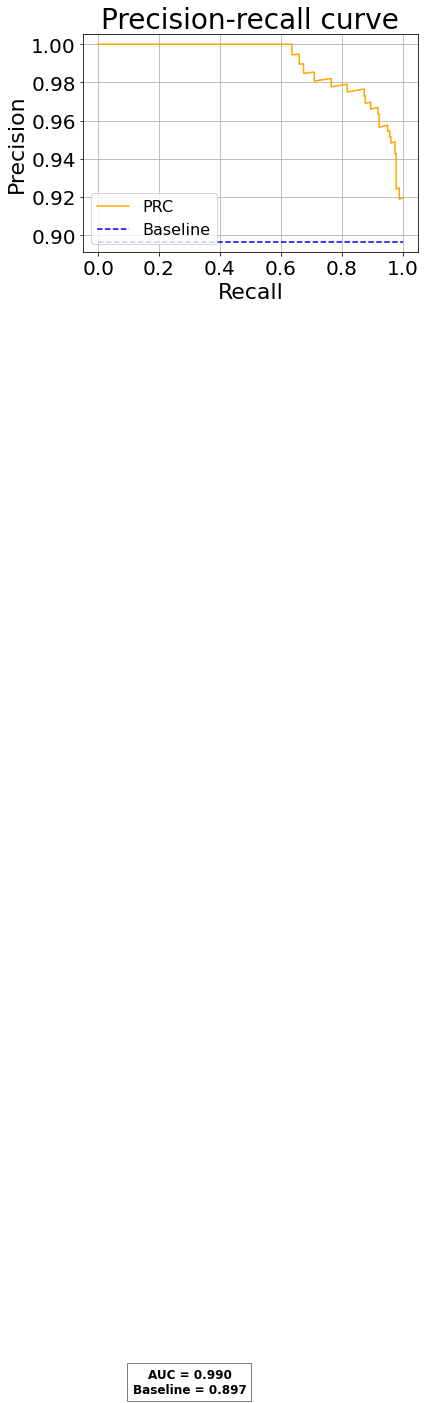

<Figure size 864x576 with 0 Axes>

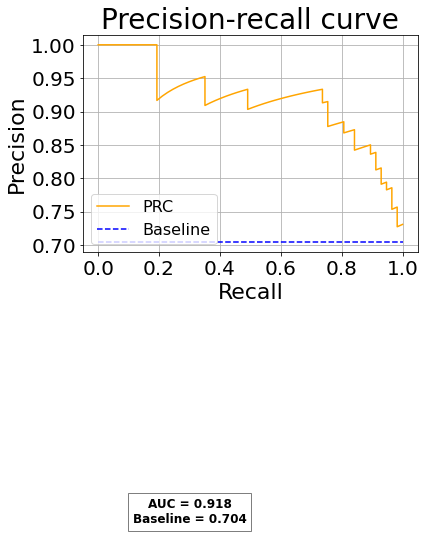

<Figure size 864x576 with 0 Axes>

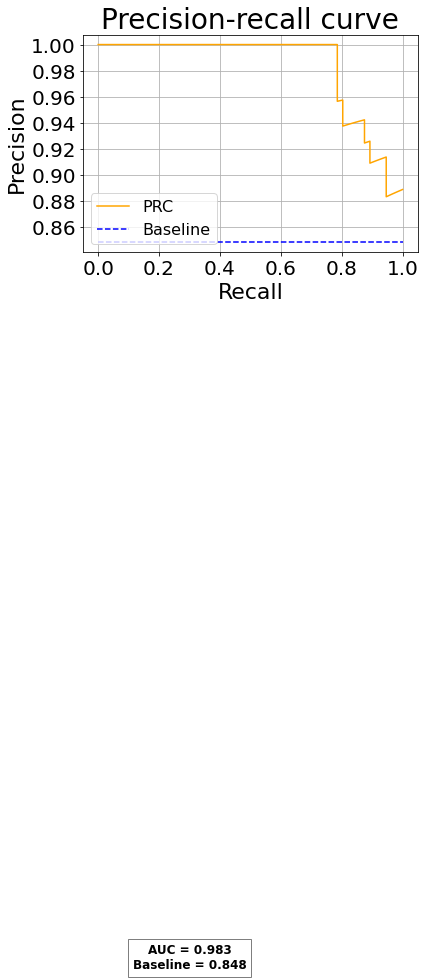

<Figure size 864x576 with 0 Axes>

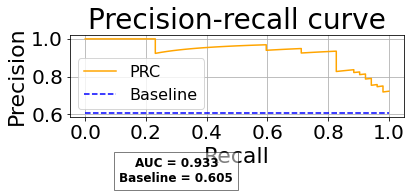

<Figure size 864x576 with 0 Axes>

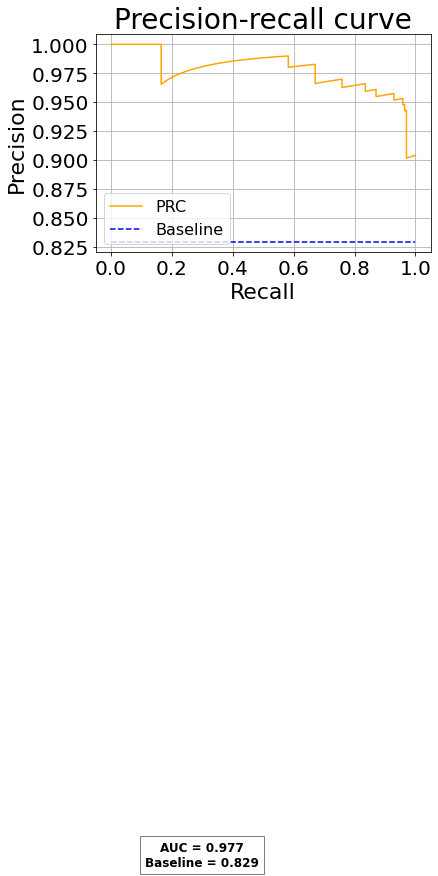

<Figure size 864x576 with 0 Axes>

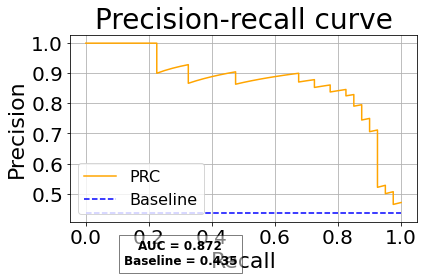

<Figure size 864x576 with 0 Axes>

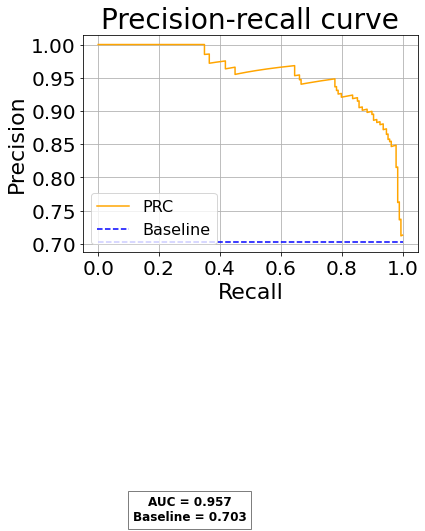

<Figure size 864x576 with 0 Axes>

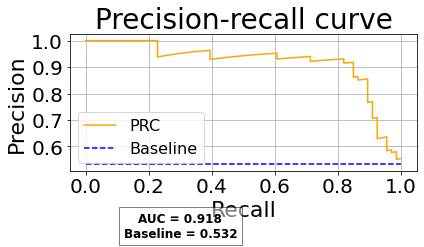

<Figure size 864x576 with 0 Axes>

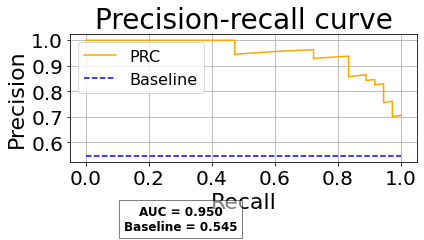

<Figure size 864x576 with 0 Axes>

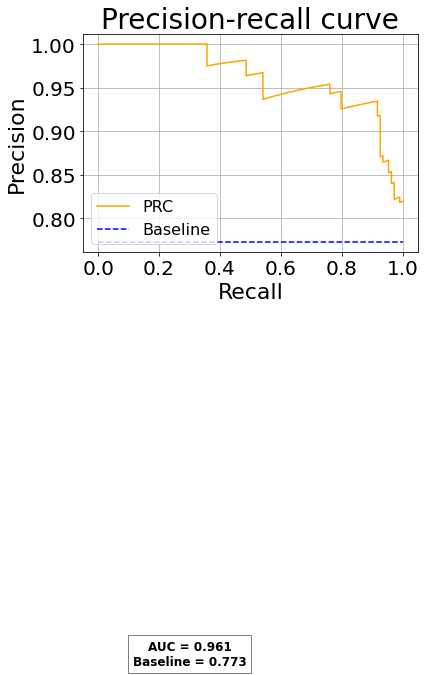

<Figure size 864x576 with 0 Axes>

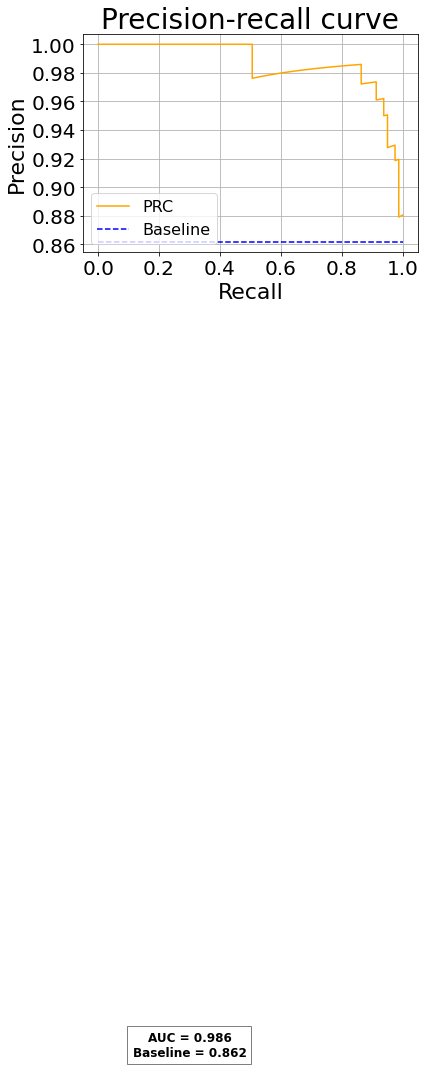

<Figure size 864x576 with 0 Axes>

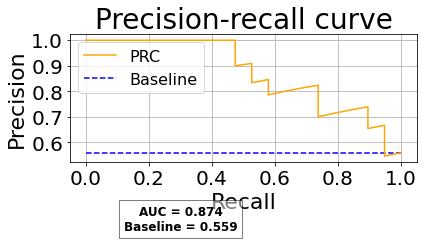

<Figure size 864x576 with 0 Axes>

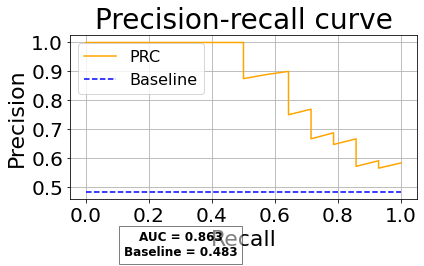

<Figure size 864x576 with 0 Axes>

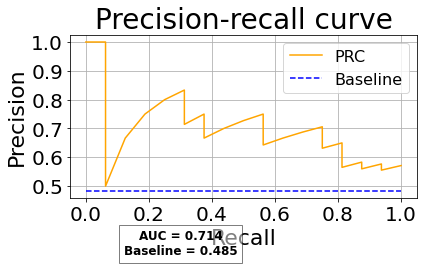

<Figure size 864x576 with 0 Axes>

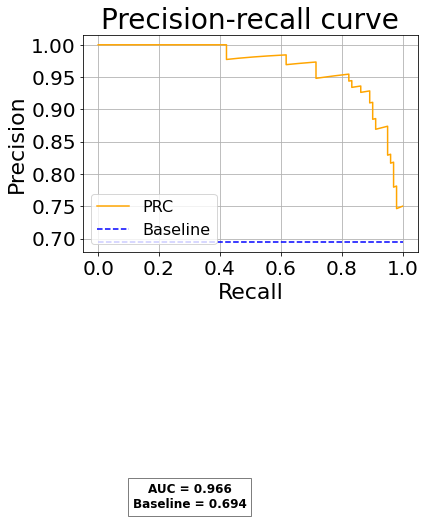

<Figure size 864x576 with 0 Axes>

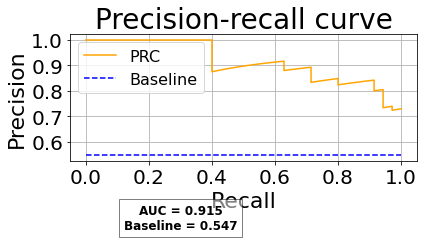

<Figure size 864x576 with 0 Axes>

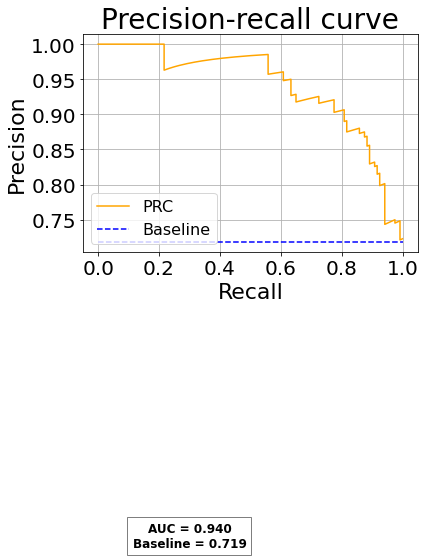

<Figure size 864x576 with 0 Axes>

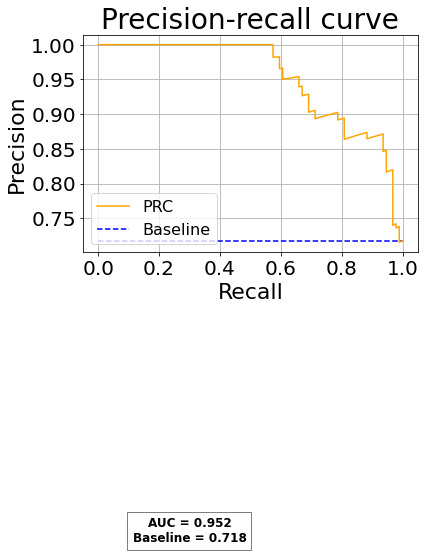

<Figure size 864x576 with 0 Axes>

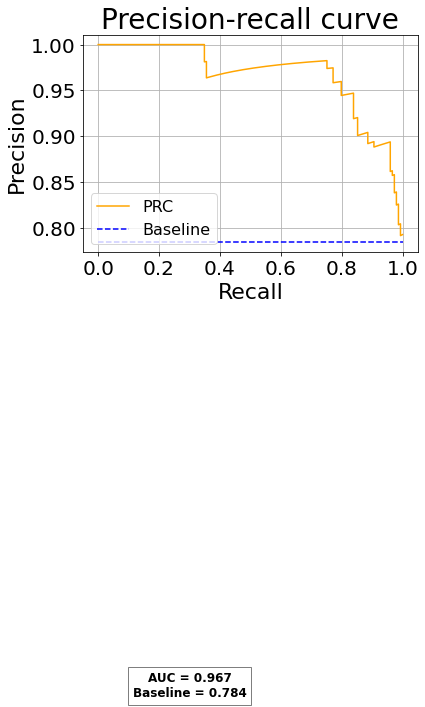

<Figure size 864x576 with 0 Axes>

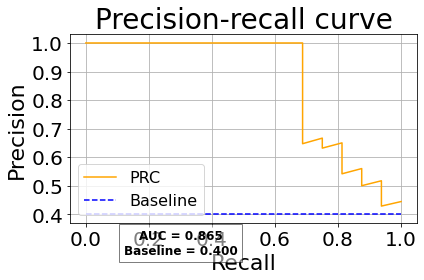

<Figure size 864x576 with 0 Axes>

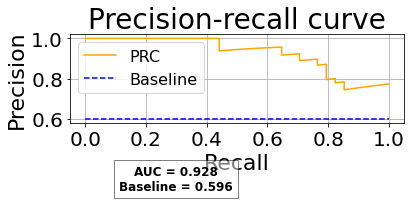

<Figure size 864x576 with 0 Axes>

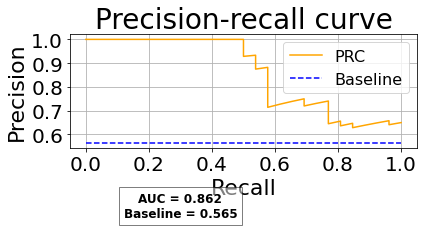

<Figure size 864x576 with 0 Axes>

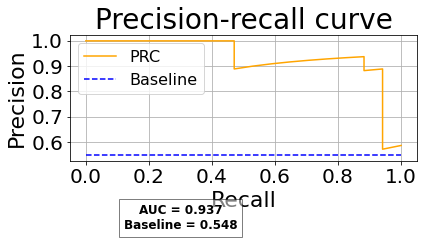

<Figure size 864x576 with 0 Axes>

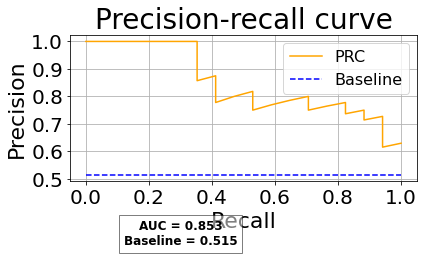

<Figure size 864x576 with 0 Axes>

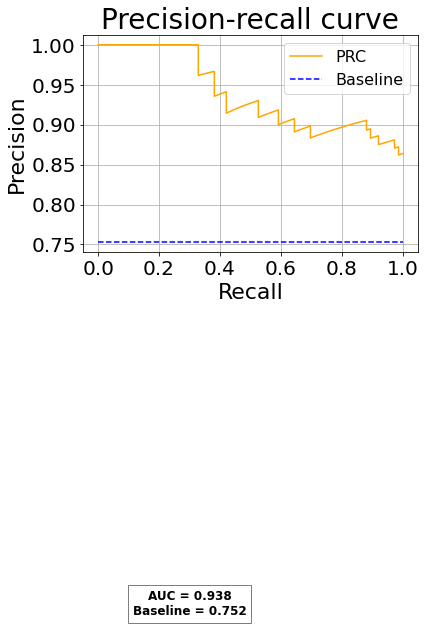

<Figure size 864x576 with 0 Axes>

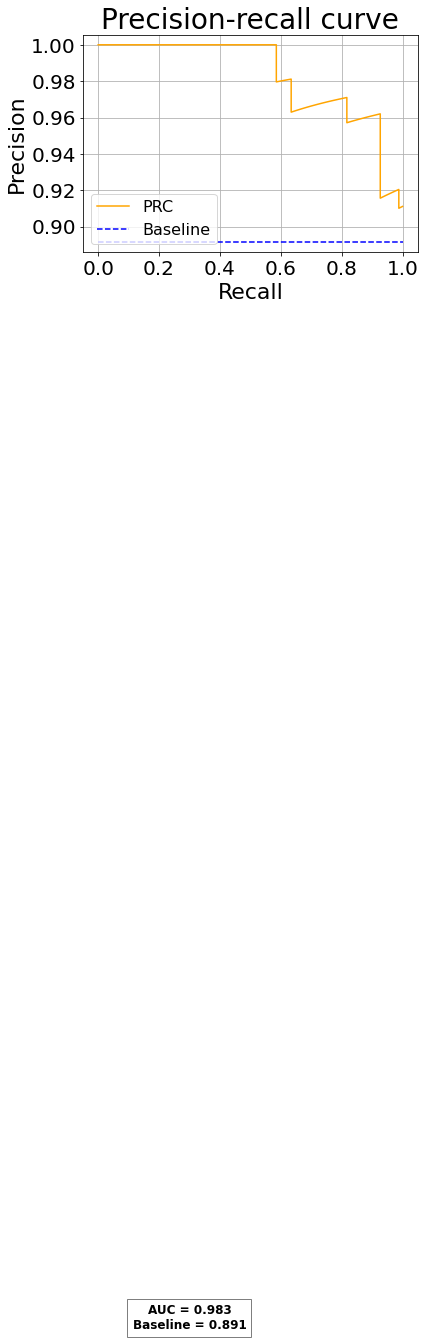

<Figure size 864x576 with 0 Axes>

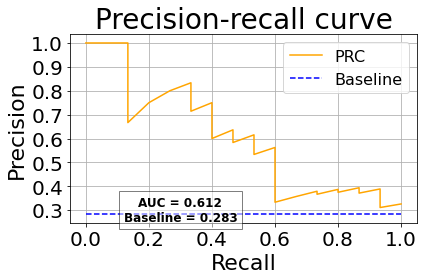

<Figure size 864x576 with 0 Axes>

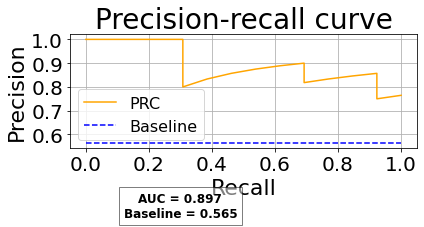

<Figure size 864x576 with 0 Axes>

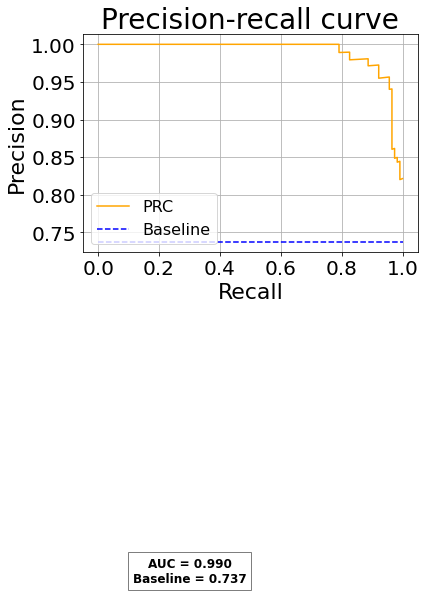

<Figure size 864x576 with 0 Axes>

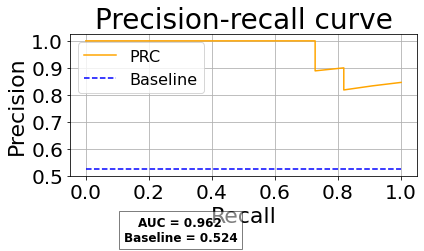

<Figure size 864x576 with 0 Axes>

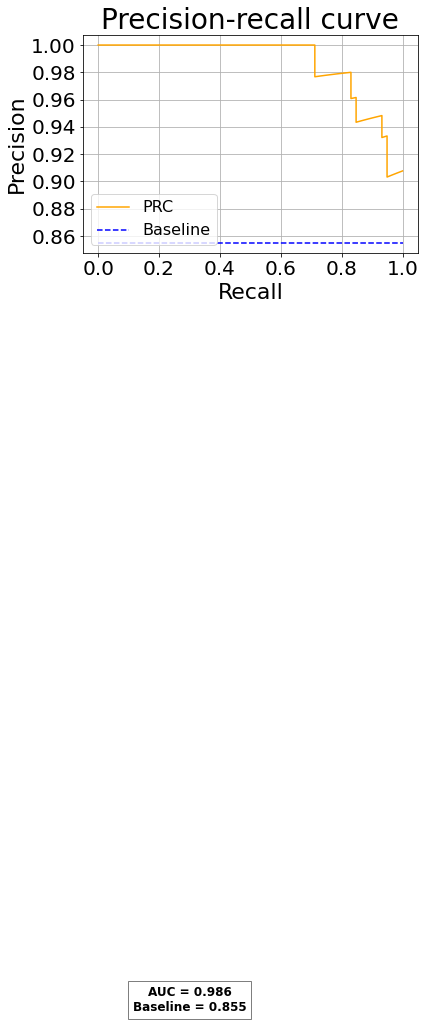

<Figure size 864x576 with 0 Axes>

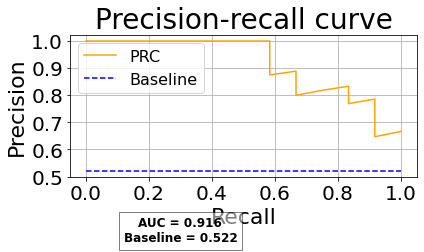

<Figure size 864x576 with 0 Axes>

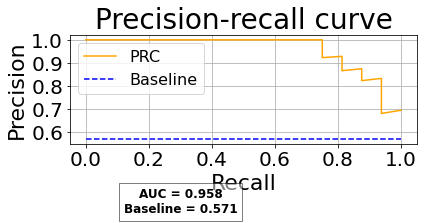

<Figure size 864x576 with 0 Axes>

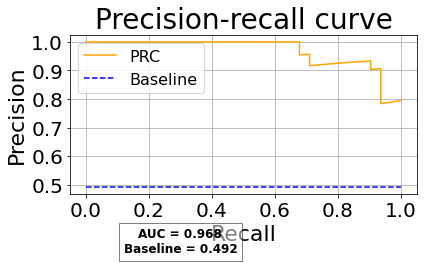

In [ ]:
test_mccs = []
test_se = []
test_sp = []
test_pre = []
test_targets = []
test_aucprs = []
test_n_samples = []
test_actives = []
test_inactives = []
for i,name in enumerate(cols):
  tg0 = y_test[:, i]
  mask = tg0>=0
  tg0 = tg0[mask].astype(np.int64)
  pred0 = test_preds[:, i][mask]
  probas0 = test_probas[:, i][mask]

  mcc = matthews_corrcoef(tg0,pred0) # MCC
  pre = precision_score(tg0,pred0) # Precision
  se = recall_score(tg0,pred0) # Recall
  sp = recall_score(tg0,pred0,pos_label=0) # Specificity
  aucpr = average_precision_score(tg0,probas0) # Precision-recall AUC
  samples = len(tg0) # Num compouds
  acts = Counter(tg0)[1] # Num actives
  inacts = Counter(tg0)[0] # Num inactives

  test_mccs.append(mcc)
  test_se.append(se)
  test_sp.append(sp)
  test_pre.append(pre)
  test_aucprs.append(aucpr)
  test_targets.append(name)
  test_n_samples.append(samples)
  test_actives.append(acts)
  test_inactives.append(inacts)

  legends = ['PRC','Baseline']
  baseline_prauc = tg0[tg0==1].sum()/tg0.shape[0]
  precision,recall,tresholds = precision_recall_curve(tg0,probas0)

  fig = plt.figure(figsize=(12,8))
  fig, ax = plt.subplots()
  plt.title('Precision-recall curve',fontsize=28)
  ax.plot(recall,precision,color='orange',linewidth=1.5)
  ax.hlines(y=baseline_prauc,xmin=0.,xmax=1.,linestyle = '--',color='blue',linewidth=1.5)

  ax.text(0.3, .3, 'AUC = {:.3f}\nBaseline = {:.3f}'.format(aucpr,baseline_prauc),fontweight='bold',
        color='k',fontsize=12,verticalalignment='center', horizontalalignment='center',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
  plt.xlabel('Recall',fontsize=22)
  plt.ylabel('Precision',fontsize=22)
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.grid()
  plt.tight_layout()
  plt.legend(legends,fontsize=16)

test_results = pd.DataFrame({'Target': test_targets, 
                             'MCC':test_mccs,
                             'Sp': test_sp,
                             'Se': test_se,
                             'Pre': test_pre,
                             'AUC-PR': test_aucprs,
                             'Compounds': test_n_samples,
                             'Actives' : test_actives,
                             'Inactives' : test_inactives
                             })

In [ ]:
#test_results.to_csv('/content/classifier/testset.csv',index=False)
test_results

,Target,MCC,Sp,Se,Pre,AUC-PR,Compounds,Actives,Inactives
0,CHEMBL203,0.648817,0.818815,0.829932,0.824324,0.879790,581,294,287
1,CHEMBL1824,0.644666,0.731707,0.898990,0.801802,0.903731,181,99,82
2,CHEMBL4128,0.559696,0.617647,0.909091,0.754717,0.865339,78,44,34
3,CHEMBL4439,0.738623,0.740741,0.959184,0.870370,0.976610,76,49,27
4,CHEMBL258,0.441457,0.612903,0.817073,0.736264,0.836908,144,82,62
...,...,...,...,...,...,...,...,...,...
87,CHEMBL4079,0.715626,0.800000,0.909091,0.833333,0.961772,21,11,10
88,CHEMBL3116,0.457385,0.400000,0.966102,0.904762,0.986379,69,59,10
89,CHEMBL4899,0.516459,0.909091,0.583333,0.875000,0.916065,23,12,11
90,CHEMBL5314,0.708333,0.833333,0.875000,0.875000,0.958285,28,16,12


In [ ]:
preds = np.where(probas[:,0]>=0.0035,1,0)
#frags preds = np.where(probas[:,0]>=0.00028414465,1,0)

[[791  11]
 [ 68  10]]


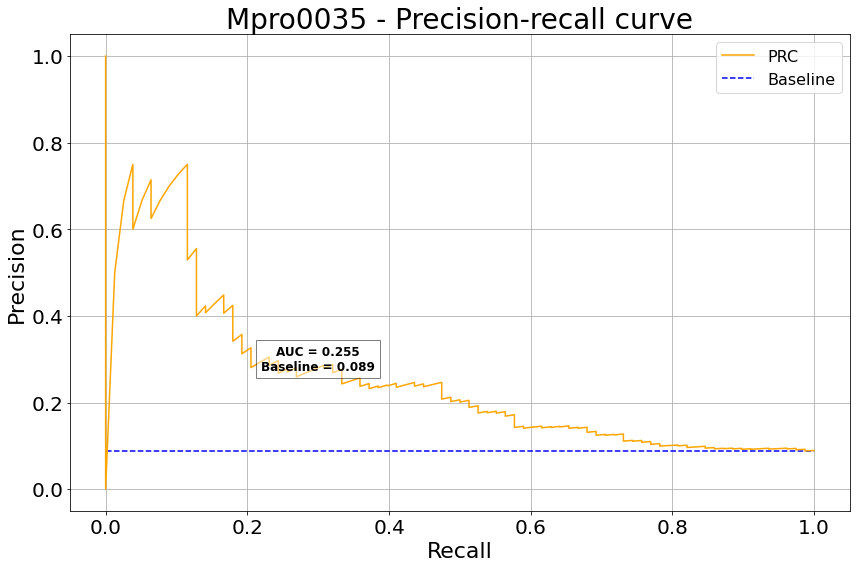

In [ ]:
test_results=  model_metrics(y=mpro['activity'].values,preds=preds,proba=probas[:,0],save_dir=Path('/content/cov_classifier'),dt='Mpro0035')

In [ ]:
test_results

,Se,Sp,Pre,MCC,Balanced accuracy,Balanced accuracy-adjusted,G-mean,AUC-ROC,AUC-PRC
0,0.192308,0.962594,0.333333,0.199866,0.577451,0.154901,0.430249,0.675475,0.255172


In [ ]:
i += 1

In [ ]:
i

6

In [ ]:
!tar -cvf drive/My\ Drive/DDPlarform/classification_prototype_model.tar.gz classifier/*

classifier/bestmodel.pth
classifier/crossvalidation/
classifier/data_cls.pkl
classifier/fit1.pth
classifier/fit2.pth
classifier/fit3.pth
classifier/fit4.pth
classifier/fit5.pth
classifier/history.csv
classifier/prototype_model.pkl
classifier/testset.csv
classifier/tmp.pth
classifier/validset.csv


In [ ]:
!tar -xvf drive/My\ Drive/Generative/sars/scaffold_splits.tar.gz
!tar -xvf drive/My\ Drive/Generative/sars/random_splits.tar.gz

In [ ]:
randomsxal = ['/content/classifier/crossvalidation/random1/Validation_results.csv',
           '/content/classifier/crossvalidation/random2/Validation_results.csv',
           '/content/classifier/crossvalidation/random3/Validation_results.csv',
           '/content/classifier/crossvalidation/random4/Validation_results.csv',
           '/content/classifier/crossvalidation/random5/Validation_results.csv']

scaffoldsxal = ['/content/classifier/crossvalidation/scaffold1/Validation_results.csv',
           '/content/classifier/crossvalidation/scaffold2/Validation_results.csv',
           '/content/classifier/crossvalidation/scaffold3/Validation_results.csv',
           '/content/classifier/crossvalidation/scaffold4/Validation_results.csv',
           '/content/classifier/crossvalidation/scaffold5/Validation_results.csv']

randomsxaltest = ['/content/classifier/crossvalidation/random1/Test_results.csv',
           '/content/classifier/crossvalidation/random2/Test_results.csv',
           '/content/classifier/crossvalidation/random3/Test_results.csv',
           '/content/classifier/crossvalidation/random4/Test_results.csv',
           '/content/classifier/crossvalidation/random5/Test_results.csv']

randomsxalmpro = ['/content/classifier/crossvalidation/random1/Mpro_results.csv',
           '/content/classifier/crossvalidation/random2/Mpro_results.csv',
           '/content/classifier/crossvalidation/random3/Mpro_results.csv',
           '/content/classifier/crossvalidation/random4/Mpro_results.csv',
           '/content/classifier/crossvalidation/random5/Mpro_results.csv']
           
scaffoldsxaltest = ['/content/classifier/crossvalidation/scaffold1/Test_results.csv',
           '/content/classifier/crossvalidation/scaffold2/Test_results.csv',
           '/content/classifier/crossvalidation/scaffold3/Test_results.csv',
           '/content/classifier/crossvalidation/scaffold4/Test_results.csv',
           '/content/classifier/crossvalidation/scaffold5/Test_results.csv']

scaffoldsxalmpro = ['/content/classifier/crossvalidation/scaffold1/Mpro_results.csv',
           '/content/classifier/crossvalidation/scaffold2/Mpro_results.csv',
           '/content/classifier/crossvalidation/scaffold3/Mpro_results.csv',
           '/content/classifier/crossvalidation/scaffold4/Mpro_results.csv',
           '/content/classifier/crossvalidation/scaffold5/Mpro_results.csv']

In [ ]:
randomresults = pd.concat([pd.read_csv(x) for x in randomsxal])
scaffoldresults = pd.concat([pd.read_csv(x) for x in scaffoldsxal])

randomresultstest = pd.concat([pd.read_csv(x) for x in randomsxaltest])
scaffoldresultstest = pd.concat([pd.read_csv(x) for x in scaffoldsxaltest])

randomresultsmpro = pd.concat([pd.read_csv(x) for x in randomsxalmpro])
scaffoldresultsmpro = pd.concat([pd.read_csv(x) for x in scaffoldsxalmpro])

In [ ]:
randomresults['Method'] = 'Validation'
randomresults['fold'] = randomresults.index
randomresults

,Se,Sp,Pre,MCC,Balanced accuracy,Balanced accuracy-adjusted,G-mean,AUC-ROC,AUC-PRC,Method,fold
0,0.444444,0.996331,0.208955,0.302601,0.720388,0.440776,0.665443,0.761530,0.316418,Validation,0
0,0.444444,0.995951,0.193103,0.290701,0.720198,0.440395,0.665316,0.784730,0.342764,Validation,0
0,0.523810,0.992870,0.138075,0.266085,0.758340,0.516680,0.721162,0.832459,0.324591,Validation,0
0,0.365079,0.996228,0.174242,0.249907,0.680653,0.361307,0.603077,0.762289,0.317538,Validation,0
0,0.333333,0.996574,0.175000,0.239276,0.664954,0.329907,0.576360,0.746967,0.247673,Validation,0


In [ ]:
randomresultstest['Method'] = 'Test'
randomresultstest.reset_index(drop=True,inplace=True)
randomresultstest['fold'] = randomresultstest.index
randomresultstest

randomresultsmpro['Method'] = 'SARS-CoV-2 $M^{pro}$'
randomresultsmpro.reset_index(drop=True,inplace=True)
randomresultsmpro['fold'] = randomresultsmpro.index
randomresultsmpro

,Se,Sp,Pre,MCC,Balanced accuracy,Balanced accuracy-adjusted,G-mean,AUC-ROC,AUC-PRC,Method,fold
0,0.205128,0.945137,0.266667,0.169438,0.575133,0.150265,0.440312,0.634743,0.216145,SARS-CoV-2 $M^{pro}$,0
1,0.230769,0.943890,0.285714,0.192551,0.587330,0.174660,0.466713,0.651464,0.203756,SARS-CoV-2 $M^{pro}$,1
2,0.474359,0.804239,0.190722,0.191007,0.639299,0.278598,0.617655,0.639091,0.185172,SARS-CoV-2 $M^{pro}$,2
3,0.256410,0.961347,0.392157,0.264877,0.608878,0.217757,0.496487,0.650106,0.245742,SARS-CoV-2 $M^{pro}$,3
4,0.217949,0.958853,0.340000,0.217068,0.588401,0.176802,0.457144,0.673509,0.248237,SARS-CoV-2 $M^{pro}$,4


In [ ]:
randomall = pd.concat([randomresults,randomresultstest, randomresultsmpro])
randomall.drop('fold',axis=1,inplace=True)
randomall

,Se,Sp,Pre,MCC,Balanced accuracy,Balanced accuracy-adjusted,G-mean,AUC-ROC,AUC-PRC,Method
0,0.444444,0.996331,0.208955,0.302601,0.720388,0.440776,0.665443,0.761530,0.316418,Validation
0,0.444444,0.995951,0.193103,0.290701,0.720198,0.440395,0.665316,0.784730,0.342764,Validation
0,0.523810,0.992870,0.138075,0.266085,0.758340,0.516680,0.721162,0.832459,0.324591,Validation
0,0.365079,0.996228,0.174242,0.249907,0.680653,0.361307,0.603077,0.762289,0.317538,Validation
0,0.333333,0.996574,0.175000,0.239276,0.664954,0.329907,0.576360,0.746967,0.247673,Validation
0,0.365079,0.996366,0.179688,0.253862,0.680723,0.361445,0.603119,0.817254,0.281709,Test
1,0.365079,0.995639,0.154362,0.234905,0.680359,0.360719,0.602899,0.758499,0.290399,Test
2,0.301587,0.991105,0.068841,0.140357,0.646346,0.292693,0.546722,0.751964,0.142460,Test
3,0.444444,0.995951,0.193103,0.290701,0.720198,0.440395,0.665316,0.834349,0.348984,Test
4,0.380952,0.996539,0.193548,0.269355,0.688746,0.377491,0.616144,0.839170,0.313277,Test


In [ ]:
randomall['Split'] = 'Random'
randomall.to_csv('random_splits.csv',index=False)

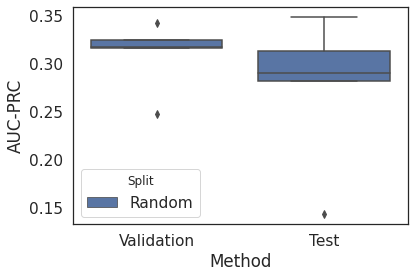

In [ ]:
ax= sns.boxplot(x='Method',y='AUC-PRC',hue='Split',data=randomall)

In [ ]:
scaffoldresults['Method'] = 'Validation'
scaffoldresults['Split'] = 'Scaffold'
scaffoldresultstest['Method'] = 'Test'
scaffoldresultstest['Split'] = 'Scaffold'
scaffoldresultsmpro['Method'] = 'SARS-CoV-2 $M^{pro}$'
scaffoldresultsmpro['Split'] = 'Scaffold'
scaffoldall = pd.concat([scaffoldresults,scaffoldresultstest, scaffoldresultsmpro])
scaffoldall

,Se,Sp,Pre,MCC,Balanced accuracy,Balanced accuracy-adjusted,G-mean,AUC-ROC,AUC-PRC,Method,Split
0,0.250000,0.995952,0.106870,0.161017,0.622976,0.245952,0.498987,0.759318,0.132204,Validation,Scaffold
0,0.436364,0.995813,0.165517,0.266585,0.716088,0.432177,0.659194,0.829309,0.356642,Validation,Scaffold
0,0.288136,0.995744,0.121429,0.184546,0.641940,0.283879,0.535639,0.740269,0.239979,Validation,Scaffold
0,0.428571,0.998096,0.375000,0.399186,0.713333,0.426667,0.654030,0.786213,0.296479,Validation,Scaffold
0,0.253968,0.996470,0.135593,0.183165,0.625219,0.250438,0.503062,0.804528,0.231868,Validation,Scaffold
0,0.402597,0.995949,0.209459,0.287825,0.699273,0.398546,0.633219,0.840306,0.269135,Test,Scaffold
0,0.064516,0.996712,0.040404,0.048485,0.530614,0.061228,0.253582,0.671804,0.015532,Test,Scaffold
0,0.245614,0.995640,0.100000,0.154160,0.620627,0.241254,0.494513,0.757955,0.068087,Test,Scaffold
0,0.368421,0.997336,0.214286,0.279142,0.682878,0.365757,0.606168,0.812300,0.309230,Test,Scaffold
0,0.305085,0.996021,0.135338,0.200805,0.650553,0.301105,0.551245,0.759078,0.262024,Test,Scaffold


In [ ]:
allresults = pd.concat([randomall,scaffoldall])
allresults

,Se,Sp,Pre,MCC,Balanced accuracy,Balanced accuracy-adjusted,G-mean,AUC-ROC,AUC-PRC,Method,Split
0,0.444444,0.996331,0.208955,0.302601,0.720388,0.440776,0.665443,0.761530,0.316418,Validation,Random
0,0.444444,0.995951,0.193103,0.290701,0.720198,0.440395,0.665316,0.784730,0.342764,Validation,Random
0,0.523810,0.992870,0.138075,0.266085,0.758340,0.516680,0.721162,0.832459,0.324591,Validation,Random
0,0.365079,0.996228,0.174242,0.249907,0.680653,0.361307,0.603077,0.762289,0.317538,Validation,Random
0,0.333333,0.996574,0.175000,0.239276,0.664954,0.329907,0.576360,0.746967,0.247673,Validation,Random
0,0.365079,0.996366,0.179688,0.253862,0.680723,0.361445,0.603119,0.817254,0.281709,Test,Random
1,0.365079,0.995639,0.154362,0.234905,0.680359,0.360719,0.602899,0.758499,0.290399,Test,Random
2,0.301587,0.991105,0.068841,0.140357,0.646346,0.292693,0.546722,0.751964,0.142460,Test,Random
3,0.444444,0.995951,0.193103,0.290701,0.720198,0.440395,0.665316,0.834349,0.348984,Test,Random
4,0.380952,0.996539,0.193548,0.269355,0.688746,0.377491,0.616144,0.839170,0.313277,Test,Random


In [ ]:
allresults.to_csv(Drive/'sars/crossvalidation_results.csv',index=False)

In [ ]:
print(randomresults['AUC-PRC'].mean(),randomresults['AUC-PRC'].std())
print(randomresultstest['AUC-PRC'].mean(),randomresultstest['AUC-PRC'].std())
print('\n')
print(scaffoldresults['AUC-PRC'].mean(),scaffoldresults['AUC-PRC'].std())
print(scaffoldresultstest['AUC-PRC'].mean(),scaffoldresultstest['AUC-PRC'].std())

print(round(scaffoldresults['AUC-PRC'].mean(),3), '±' ,round(scaffoldresults['AUC-PRC'].std(),3))
print(round(scaffoldresultstest['AUC-PRC'].mean(),3),'±',round(scaffoldresultstest['AUC-PRC'].std(),3))
print(round(scaffoldresultsmpro['AUC-PRC'].mean(),3),'±',round(scaffoldresultsmpro['AUC-PRC'].std(),3))

0.3097968946436194 0.03629337356570697
0.2753656566897761 0.07871944685102948


0.2514344941911561 0.08340802329224314
0.18480147613600617 0.13307179672439207
0.251 ± 0.083
0.185 ± 0.133
0.202 ± 0.064


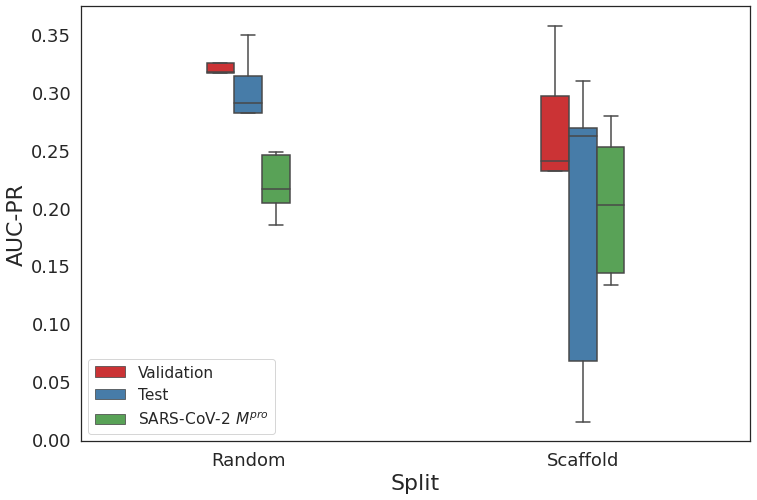

In [ ]:
plt.figure(figsize=(12, 8))
ax= sns.boxplot(x='Split',y='AUC-PRC',hue='Method',width=0.25,data=allresults,palette='Set1',showfliers=False)
ax.set_xlabel("Split",fontsize=22)
ax.set_ylabel("AUC-PR",fontsize=22)
#plt.legend(['Validation','Test','SARS-Cov-2 $M^{pro}$'])
ax.tick_params(labelsize=18)
ax.legend(title=None)
plt.savefig(Drive/'sars/crossvalidation_results_mpro.png',dpi=300)